In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import seaborn as sns
import warnings
import os
import glob
import cv2

In [14]:
# Set the path to the folder containing the images
folder_path = "/kaggle/input/maizeleafcounting/MaizeLeafCounting-master/CountingByRegression_CNNs/example_images"
# Use glob to find all files in the folder with a .jpg or .png extension
image_files = glob.glob(os.path.join(folder_path,"*.jpg"))
# Count the number of files
num_images = len(image_files)
print(f"total images{num_images}")

total images360


In [15]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import os
import pandas as pd
import numpy as np
train =  pd.read_csv("/kaggle/input/maizeleafcounting/MaizeLeafCounting-master/CountingByRegression_CNNs/example_training.csv")
name_images = train["fn"]
y_train = train["label"]

p = Path('/kaggle/input/maizeleafcounting/MaizeLeafCounting-master/CountingByRegression_CNNs/example_images')
image_paths = list(p.glob('*.jpg'))
images = []
cnt = 0
x_train = np.zeros(shape=(240, 224, 224, 3))

for name_image in name_images:
    for image_path in image_paths:
        filename = os.path.basename(image_path)
        if(filename == name_image):
            with Image.open(image_path) as img:
                img = img.resize((224, 224))
                x_train[cnt] = img
                #plt.imshow(img)
                #plt.title(y_train[cnt])
                #print(image_path)
                #plt.show()
                cnt += 1

In [16]:
x_train = x_train/255
x_train

array([[[[0.99607843, 0.99607843, 0.94901961],
         [0.99607843, 0.99607843, 0.94901961],
         [0.99607843, 0.99607843, 0.94901961],
         ...,
         [1.        , 0.99607843, 0.97647059],
         [1.        , 0.99607843, 0.97647059],
         [1.        , 0.99607843, 0.97647059]],

        [[0.99607843, 0.99607843, 0.94901961],
         [0.99607843, 0.99607843, 0.94901961],
         [0.99607843, 0.99607843, 0.94901961],
         ...,
         [1.        , 0.99607843, 0.97647059],
         [1.        , 0.99607843, 0.97647059],
         [1.        , 0.99607843, 0.97647059]],

        [[0.99607843, 1.        , 0.94509804],
         [0.99607843, 1.        , 0.94509804],
         [0.99607843, 1.        , 0.94509804],
         ...,
         [1.        , 0.99607843, 0.97647059],
         [1.        , 0.99607843, 0.97647059],
         [1.        , 0.99607843, 0.97647059]],

        ...,

        [[0.98039216, 0.93333333, 0.84705882],
         [0.98039216, 0.93333333, 0.84705882]

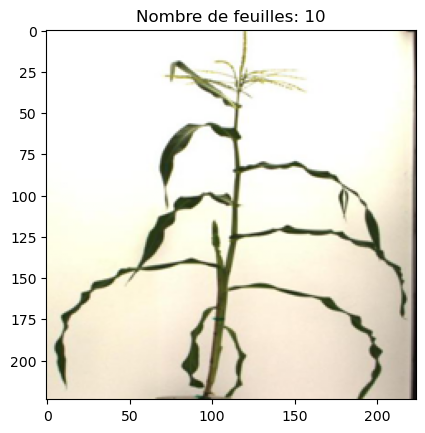

In [17]:
# Create a subplot and plot the image
#plt.subplot(1, 2, 1)
plt.imshow(x_train[120])
# Add the classification and results to the subplot
plt.title(f"Nombre de feuilles: {y_train[120]}")
    
# Show the plot
plt.show()

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import os
import pandas as pd
import numpy as np
test =  pd.read_csv("/kaggle/input/maizeleafcounting/MaizeLeafCounting-master/CountingByRegression_CNNs/example_testing.csv")
name_imagetest = test["fn"]
y_test = test["label"]

p = Path('/kaggle/input/maizeleafcounting/MaizeLeafCounting-master/CountingByRegression_CNNs/example_images')
image_paths = list(p.glob('*.jpg'))
images = []
cnt1 = 0
x_test = np.zeros(shape=(60, 224, 224, 3))

for name_image in name_imagetest:
    for image_path in image_paths:
        filename = os.path.basename(image_path)
        if(filename == name_image):
            with Image.open(image_path) as img:
                img = img.resize((224, 224))
                x_test[cnt1] = img
                #plt.imshow(img)
                #plt.title(y_test[cnt1])
                #print(image_path)
                #plt.show()
                cnt1 += 1

In [19]:
x_test = x_test/255
x_test

array([[[[1.        , 1.        , 0.95294118],
         [1.        , 1.        , 0.95294118],
         [1.        , 1.        , 0.95294118],
         ...,
         [1.        , 0.99607843, 0.97647059],
         [1.        , 0.99607843, 0.97647059],
         [1.        , 1.        , 0.96862745]],

        [[1.        , 1.        , 0.95294118],
         [1.        , 1.        , 0.95294118],
         [1.        , 1.        , 0.95294118],
         ...,
         [1.        , 0.99607843, 0.97647059],
         [1.        , 0.99607843, 0.97647059],
         [1.        , 1.        , 0.96862745]],

        [[1.        , 1.        , 0.95294118],
         [1.        , 1.        , 0.95294118],
         [1.        , 1.        , 0.95294118],
         ...,
         [1.        , 0.99607843, 0.97647059],
         [1.        , 0.99607843, 0.97647059],
         [1.        , 1.        , 0.96862745]],

        ...,

        [[0.99607843, 0.98823529, 0.90588235],
         [0.99607843, 0.98823529, 0.90588235]

In [20]:
y_test

0      4
1      4
2      4
3      4
4      4
5      5
6      5
7      5
8      5
9      5
10     6
11     6
12     6
13     6
14     6
15     7
16     7
17     7
18     7
19     7
20     8
21     8
22     8
23     8
24     8
25     9
26     9
27     9
28     9
29     9
30    10
31    10
32    10
33    10
34    10
35    11
36    11
37    11
38    11
39    11
40    12
41    12
42    12
43    12
44    12
45    13
46    13
47    13
48    13
49    13
50    14
51    14
52    14
53    14
54    14
55    15
56    15
57    15
58    15
59    15
Name: label, dtype: int64

In [21]:
width, height, channels = x_train.shape[1], x_train.shape[2], 1

In [22]:
x_train.shape
x_test.shape

(60, 224, 224, 3)

In [26]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the CNN model architecture
model = tf.keras.Sequential([
    layers.Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])
model.summary()
# Compile the model
#model.compile(optimizer='adam',loss='mean_squared_error',metrics=["mae"])

# Train the model
#h=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32,shuffle=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 64)      51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 49, 49, 64)        102464    
                                                                 
 flatten_2 (Flatten)         (None, 153664)           

In [ ]:
# Define the CNN model architecture
model = tf.keras.Sequential([
    layers.Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (5, 5), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

2/2 [==============================] - 1s 641ms/step - loss: 3.4622 - mae: 1.4602


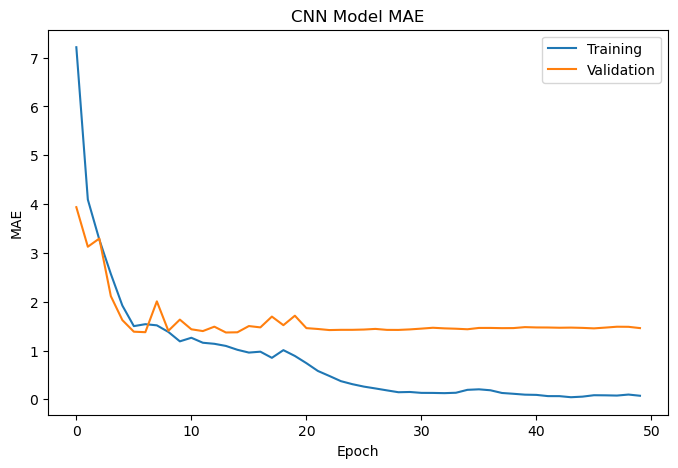

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

results_cnn= model.evaluate(x_test,y_test)
# create a pandas DataFrame with the training and validation MAE values
mae_df = pd.DataFrame({
    'MAE': h.history['mae'],
    'val_MAE': h.history['val_mae']
})

# plot the MAE values
mae_df.plot(figsize=(8, 5))
plt.title('CNN Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])

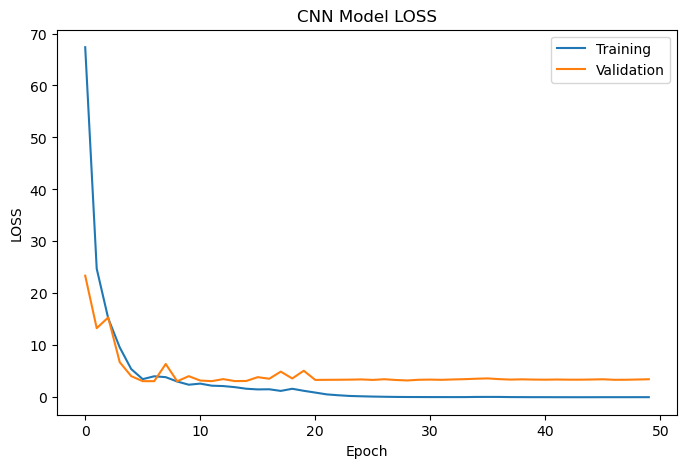

In [13]:
import matplotlib.pyplot as plt
import pandas as pd


# create a pandas DataFrame with the training and validation MAE values
mae_df = pd.DataFrame({
    'MAE': h.history['loss'],
    'val_MAE': h.history['val_loss']
})

# plot the MAE values
mae_df.plot(figsize=(8, 5))
plt.title('CNN Model LOSS')
plt.ylabel('LOSS')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])

In [14]:
#rm -r '/kaggle/working/C:\Users\Fati\Desktop\digi\saved_leafNumber_model.h5'

In [14]:
model.save("saved_leafNumber_model.h5")

In [25]:
from keras.models import load_model
model = load_model("/kaggle/input/leafs-number-model/saved_leafNumber_model (2).h5")

In [26]:
#from keras.preprocessing.image import image
import numpy as np
from PIL import Image

img = Image.open('/kaggle/input/maizeleafcounting/MaizeLeafCounting-master/CountingByRegression_CNNs/example_images/402-287-N215-WW-1_2019-05-21_09-02-21.304_Vis_SV_108.Crp.jpg')
img_arr = np.array(img.resize((224,224)))/255
img_arr = np.expand_dims(img_arr, axis=0)  # add a batch dimension

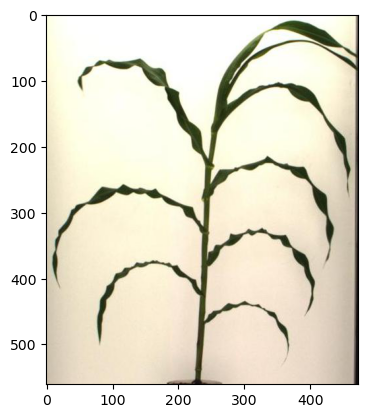

In [27]:
plt.imshow(img)

In [28]:
num_leaves = model.predict(img_arr)
print('Number of leaves:', round(num_leaves[0][0]))

1/1 [==============================] - 0s 113ms/step
Number of leaves: 9


In [29]:
#from keras.preprocessing.image import image
import numpy as np
from PIL import Image

img1 = Image.open('/kaggle/input/maizeleafcounting/MaizeLeafCounting-master/CountingByRegression_CNNs/example_images/81-108-NC306_2018-09-19_01-03-03_Vis_SV_108.Crp.jpg')
img1_arr = np.array(img1.resize((224,224)))/255
img1_arr = np.expand_dims(img1_arr, axis=0)  # add a batch dimension

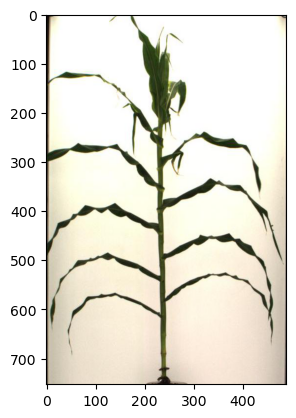

In [30]:
plt.imshow(img1)

In [31]:
num_leaves1 = model.predict(img1_arr)
print('Number of leaves:', round(num_leaves1[0][0]))

1/1 [==============================] - 0s 51ms/step
Number of leaves: 13


In [32]:
#from keras.preprocessing.image import image
import numpy as np
from PIL import Image

img2 = Image.open('/kaggle/input/plantimg/plant-de-mais-isoles-le-mais-isole-sur-blanc-p13299.jpg')
img2_arr = np.array(img2.resize((224,224)))/255
img2_arr = np.expand_dims(img2_arr, axis=0)  # add a batch dimension

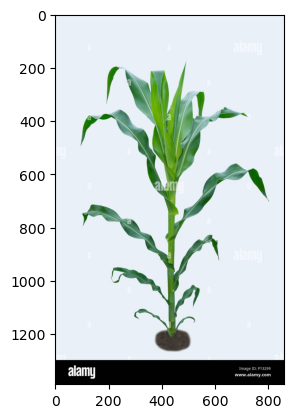

In [33]:
plt.imshow(img2)

In [34]:
num_leaves2 = model.predict(img2_arr)
print('Number of leaves:', round(num_leaves2[0][0]))

1/1 [==============================] - 0s 51ms/step
Number of leaves: 13


In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite","wb") as f:
    f.write(tflite_model)

# Resnet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
resnet_model_pretrained = ResNet50(weights=None, input_shape=(224,224,3))
resnet_model_pretrained.summary()

In [ ]:
import keras
last_layer_resnet = resnet_model_pretrained.get_layer("avg_pool")
resnet_layers_adjust = keras.Model(inputs=resnet_model_pretrained.inputs, outputs=last_layer_resnet.output )
resnet_layers_adjust.summary()

x_train_pre=preprocess_input(x_train)
x_test_pre=preprocess_input(x_test)

# Resnet 50 Strategy2 Fine Tuning Partial

In [ ]:
def model_strategy2_pretrain_Resnet50():
  resnet_model = ResNet50(weights='imagenet', input_shape=(224,224,3))
  last_layer = resnet_model.get_layer("avg_pool")
  resnet_layers = keras.Model(inputs=resnet_model.inputs, outputs=last_layer.output )
  new_model=Sequential()
  new_model.add(resnet_layers)
  new_model.add(Dense(1, activation="linear"))

  
  # On va entrainer juste les trois dernieres couches de convolution de  restnet50
  for layer in new_model.layers[0].layers[:-11]:
    layer.trainable = False 
  for layer in new_model.layers[0].layers[-11:]:
    layer.trainable = True
  return new_model


model_strategy2_resnet50=model_strategy2_pretrain_Resnet50()
model_strategy2_resnet50.summary()

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)    
model_strategy2_resnet50.compile(loss="mean_squared_error", optimizer=opt,metrics=["Precision","mae"])

In [ ]:
hist_resnet50=model_strategy2_resnet50.fit(x_train_pre, y_train, epochs=50,batch_size=32, validation_data=(x_test_pre, y_test))

In [ ]:
results_resnet50_2= model_strategy2_resnet50.evaluate(x_test_pre,y_test)
#print('Test Accuracy: %.3f' % (acc * 100))
plt.rcParams["figure.figsize"] = [8., 5.]
plt.rcParams.update({'font.size': 14})
plt.plot(hist_resnet50.history["mae"],c='b',label="Ens. d'apprentissage")
plt.plot(hist_resnet50.history["val_mae"],c='r',label="Ens. de test")
plt.xlabel('Epoch')
plt.ylabel("MAE")
#plt.ylim([0,1.01])
plt.legend()
plt.show()

In [ ]:
#print('Test Accuracy: %.3f' % (acc * 100))
plt.rcParams["figure.figsize"] = [8., 5.]
plt.rcParams.update({'font.size': 14})
plt.plot(hist_resnet50.history["loss"],c='b',label="Ens. d'apprentissage")
plt.plot(hist_resnet50.history["val_loss"],c='r',label="Ens. de test")
plt.xlabel('Epoch')
plt.ylabel("LOSS")
#plt.ylim([0,1.01])
plt.legend()
plt.show()

# ResNet strategy 1 Fine tuning total

In [ ]:
def model_strategy1_pretrain_Resnet50():
  resnet_model = ResNet50(weights="imagenet", input_shape=(224,224,3))
  last_layer = resnet_model.get_layer("avg_pool")
  resnet_layers = keras.Model(inputs=resnet_model.inputs, outputs=last_layer.output )
  
  new_model=Sequential()
  new_model.add(resnet_layers)
  new_model.add(Dense(1, activation="linear"))
  print(len(new_model.layers[0].layers))

  
  new_model.trainable=True
  return new_model

model_strategy1_resnet50=model_strategy1_pretrain_Resnet50()
model_strategy1_resnet50.summary()

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)    
model_strategy1_resnet50.compile(loss="mean_squared_error", optimizer=opt,metrics=["Precision","mae"])

In [ ]:
hist_resnet50_1=model_strategy1_resnet50.fit(x_train_pre, y_train, epochs=50,batch_size=32, validation_data=(x_test_pre, y_test))

In [ ]:
results_resnet50_1= model_strategy1_resnet50.evaluate(x_test_pre,y_test)
#print('Test Accuracy: %.3f' % (acc * 100))
plt.rcParams["figure.figsize"] = [8., 5.]
plt.rcParams.update({'font.size': 14})
plt.plot(hist_resnet50_1.history["mae"],c='b',label="Ens. d'apprentissage")
plt.plot(hist_resnet50_1.history["val_mae"],c='r',label="Ens. de test")
plt.xlabel('Epoch')
plt.ylabel("MAE")
#plt.ylim([0,1.01])
plt.legend()
plt.show()

In [ ]:
#print('Test Accuracy: %.3f' % (acc * 100))
plt.rcParams["figure.figsize"] = [8., 5.]
plt.rcParams.update({'font.size': 14})
plt.plot(hist_resnet50.history["loss"],c='b',label="Ens. d'apprentissage")
plt.plot(hist_resnet50.history["val_loss"],c='r',label="Ens. de test")
plt.xlabel('Epoch')
plt.ylabel("LOSS")
#plt.ylim([0,1.01])
plt.legend()
plt.show()

# VGG16 Strategy 1 

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

vgg_model = VGG16(weights="imagenet", input_shape=(224, 224, 3))
vgg_model.summary()

In [ ]:
# Get the last layer of the VGG16 model
last_layer_vgg = vgg_model.get_layer("fc2")

# Create a new model with adjusted layers
vgg_layers_adjust = tf.keras.Model(inputs=vgg_model.inputs, outputs=last_layer_vgg.output)

# Print the summary of the adjusted model
vgg_layers_adjust.summary()

x_train_vgg=preprocess_input(x_train)
x_test_vgg=preprocess_input(x_test)

In [ ]:
def model_strategy1_pretrain_VGG16():
  vgg_model = VGG16(weights="imagenet", input_shape=(224,224,3))
  last_layer = vgg_model.get_layer("fc2")
  vgg_layers = keras.Model(inputs=vgg_model.inputs, outputs=last_layer.output )
  
  new_model=Sequential()
  new_model.add(vgg_layers)
  new_model.add(Dense(1, activation="linear"))
  print(len(new_model.layers[0].layers))

  
  new_model.trainable=True
  return new_model

model_strategy1_vgg=model_strategy1_pretrain_VGG16()
model_strategy1_vgg.summary()

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)    
model_strategy1_vgg.compile(loss="mean_squared_error", optimizer=opt, metrics=["Precision","mae"])

In [ ]:
model_strategyVGG1_history=model_strategy1_vgg.fit(x_train_vgg, y_train, epochs=50,batch_size=32, validation_data=(x_test_vgg, y_test))

In [ ]:
results_vgg16_1= model_strategy1_vgg.evaluate(x_test_pre,y_test)
#print('Test Accuracy: %.3f' % (acc * 100))
plt.rcParams["figure.figsize"] = [8., 5.]
plt.rcParams.update({'font.size': 14})
plt.plot(model_strategyVGG1_history.history["mae"],c='b',label="Ens. d'apprentissage")
plt.plot(model_strategyVGG1_history.history["val_mae"],c='r',label="Ens. de test")
plt.xlabel('Epoch')
plt.ylabel("MAE")
#plt.ylim([0,1.01])
plt.legend()
plt.show()

In [ ]:
#print('Test Accuracy: %.3f' % (acc * 100))
plt.rcParams["figure.figsize"] = [8., 5.]
plt.rcParams.update({'font.size': 14})
plt.plot(model_strategyVGG1_history.history["loss"],c='b',label="Ens. d'apprentissage")
plt.plot(model_strategyVGG1_history.history["val_loss"],c='r',label="Ens. de test")
plt.xlabel('Epoch')
plt.ylabel("LOSS")
#plt.ylim([0,1.01])
plt.legend()
plt.show()

#  VGG 16 Strategy 2

In [ ]:
def model_strategy2_pretrain_VGG16():
  vgg16_model = VGG16(weights='imagenet', input_shape=(224,224,3))
  last_layer = vgg16_model.get_layer("fc2")
  vgg16_layers = keras.Model(inputs=vgg16_model.inputs, outputs=last_layer.output )
  new_model=Sequential()
  new_model.add(vgg16_layers)
  new_model.add(Dense(1, activation="linear"))

  
  # On va entrainer juste les trois dernieres couches de convolution de  vgg16
  for layer in new_model.layers[0].layers[:-3]:
    layer.trainable = False 
  for layer in new_model.layers[0].layers[-3:]:
    layer.trainable = True
  return new_model


model_strategy2_vgg16=model_strategy2_pretrain_VGG16()
model_strategy2_vgg16.summary()

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)    
model_strategy2_vgg16.compile(loss="mean_squared_error", optimizer=opt, metrics=["Precision","mae"])

In [ ]:
model_strategyVGG2_history=model_strategy2_vgg16.fit(x_train_vgg, y_train, epochs=50,batch_size=16, validation_data=(x_test_vgg, y_test))

In [ ]:
results_vgg16_2= model_strategy2_vgg16.evaluate(x_test_pre,y_test)
#print('Test Accuracy: %.3f' % (acc * 100))
plt.rcParams["figure.figsize"] = [8., 5.]
plt.rcParams.update({'font.size': 14})
plt.plot(model_strategyVGG2_history.history["mae"],c='b',label="Ens. d'apprentissage")
plt.plot(model_strategyVGG2_history.history["val_mae"],c='r',label="Ens. de test")
plt.xlabel('Epoch')
plt.ylabel("MAE")
#plt.ylim([0,1.01])
plt.legend()
plt.show()

In [ ]:
#print('Test Accuracy: %.3f' % (acc * 100))
plt.rcParams["figure.figsize"] = [8., 5.]
plt.rcParams.update({'font.size': 14})
plt.plot(model_strategyVGG2_history.history["loss"],c='b',label="Ens. d'apprentissage")
plt.plot(model_strategyVGG2_history.history["val_loss"],c='r',label="Ens. de test")
plt.xlabel('Epoch')
plt.ylabel("LOSS")
#plt.ylim([0,1.01])
plt.legend()
plt.show()

# data augmentation

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.1,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
batch_size = 32
num_samples = x_train.shape[0]  # Nombre total d'échantillons

# Créez un générateur de données augmentées
augmented_data_generator = datagen.flow(x_train, y_train, batch_size=batch_size, shuffle=True)
validation_generator = validation_datagen.flow(x_test, y_test, batch_size=batch_size,shuffle=True)

(32, 224, 224, 3)


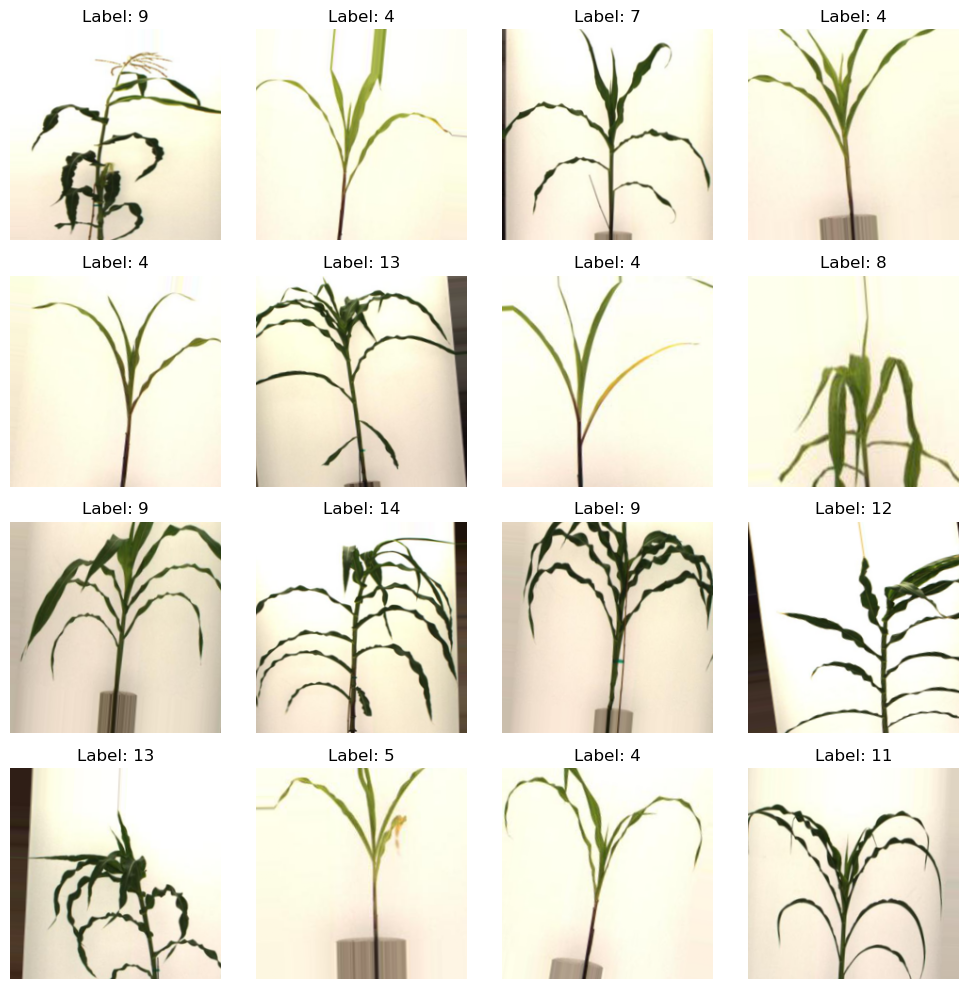

In [28]:
# Affichage des images augmentées
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
axs = axs.flatten()

augmented_images, labels = augmented_data_generator.next()
print(augmented_images.shape)

for i in range(16):
    augmented_image = augmented_images[i]  # Sélectionner la première image du lot
    axs[i].imshow(augmented_image)
    axs[i].set_title('Label: ' + str(labels[i]))  # Afficher le label correspondant
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [29]:
histcnnef = model.fit(augmented_data_generator, steps_per_epoch=len(x_train)//32 , epochs=50, validation_data=validation_generator, validation_steps=len(x_test)//32) #batch_size)

Epoch 1/50
7/7 [==============================] - 4s 546ms/step - loss: 11.0396 - mae: 2.6583 - val_loss: 71.3048 - val_mae: 7.6613
Epoch 2/50
7/7 [==============================] - 3s 355ms/step - loss: 5.6509 - mae: 2.0059 - val_loss: 56.0443 - val_mae: 6.6327
Epoch 3/50
7/7 [==============================] - 2s 320ms/step - loss: 15.9920 - mae: 3.3156 - val_loss: 99.6162 - val_mae: 9.3173
Epoch 4/50
7/7 [==============================] - 2s 340ms/step - loss: 22.7730 - mae: 3.8642 - val_loss: 71.8494 - val_mae: 7.6961
Epoch 5/50
7/7 [==============================] - 3s 370ms/step - loss: 11.6051 - mae: 2.7365 - val_loss: 70.8663 - val_mae: 7.6899
Epoch 6/50
7/7 [==============================] - 2s 337ms/step - loss: 5.6383 - mae: 1.8978 - val_loss: 55.5341 - val_mae: 6.6969
Epoch 7/50
7/7 [==============================] - 2s 367ms/step - loss: 5.8725 - mae: 1.8970 - val_loss: 67.4936 - val_mae: 7.4320
Epoch 8/50
7/7 [==============================] - 2s 337ms/step - loss: 5.5574 

1/1 [==============================] - 0s 89ms/step - loss: 41.1867 - mae: 5.5534


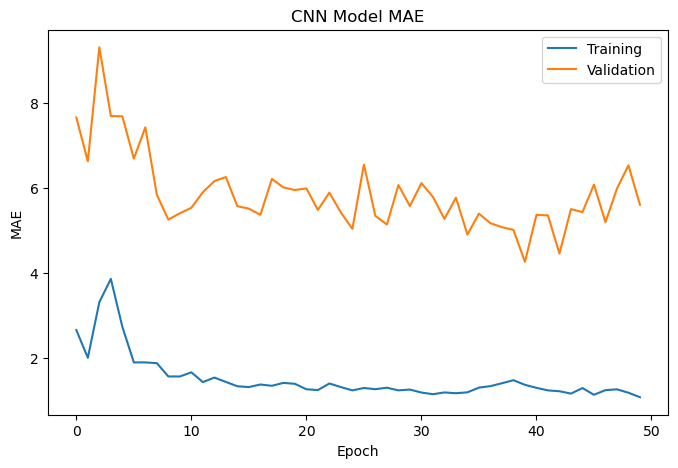

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

results_cnn= model.evaluate(validation_generator, steps=len(x_test) // 32)
# create a pandas DataFrame with the training and validation MAE values
mae_df = pd.DataFrame({
    'MAE': histcnnef.history['mae'],
    'val_MAE': histcnnef.history['val_mae']
})

# plot the MAE values
mae_df.plot(figsize=(8, 5))
plt.title('CNN Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])

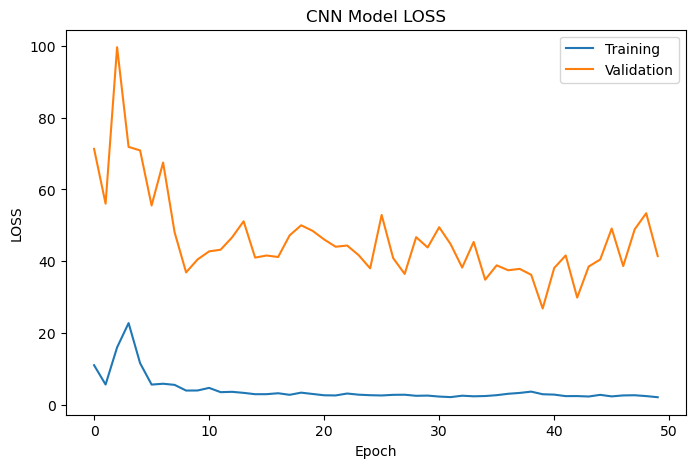

In [31]:
loss_df = pd.DataFrame({
    'LOSS': histcnnef.history['loss'],
    'val_LOSS': histcnnef.history['val_loss']
})

# plot the MAE values
loss_df.plot(figsize=(8, 5))
plt.title('CNN Model LOSS')
plt.ylabel('LOSS')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])

# surface counting

In [32]:
from glob import glob
data_path = '/kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_training/training'
subfolders = ['A1', 'A2', 'A3', 'A4']
image_paths = []
mask_paths = []
rgb_paths = []

for folder in subfolders:
    folder_path = os.path.join(data_path, folder)
    images = glob(os.path.join(folder_path, '*.png'))
    masks = glob(os.path.join(folder_path, '*_fg.png'))
    rgb = glob(os.path.join(folder_path, '*_rgb.png'))
    image_paths += images
    mask_paths += masks
    rgb_paths += rgb

print(f'Total number of images: {len(image_paths)}')
print(f'Total number of masks fg: {len(mask_paths)}')
print(f'Total number of rgb:    {len(rgb_paths)}')
rgb_paths

Total number of images: 3240
Total number of masks fg: 810
Total number of rgb:    810


['/kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_training/training/A1/plant148_rgb.png',
 '/kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_training/training/A1/plant049_rgb.png',
 '/kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_training/training/A1/plant062_rgb.png',
 '/kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_training/training/A1/plant088_rgb.png',
 '/kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_training/training/A1/plant099_rgb.png',
 '/kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_training/training/A1/plant061_rgb.png',
 '/kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_training/training/A1/plant036_rgb.png',
 '/kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_training/training/A1/plant126_rgb.png',
 '/kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_training/training/A1/plant046_rgb.png',
 '/kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_training/training/A1/plant021_rgb.png',
 '/kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_training/training/A1/plant077_rgb.png',
 '/kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_training/training/A1/plant032_rg

In [30]:
#rm -r '/kaggle/working/data.csv'

In [33]:
df_cases = pd.DataFrame(columns=['image_file','mask_file'])
# Iterate over each row in the original DataFrame;
for p in rgb_paths:
    folder_id = p.split('/')[-2]
    image_id = p.split('/')[-1].split('_')[0]
    for p1 in mask_paths:
        if(p1.split('/')[-2] == folder_id and p1.split('/')[-1].split('_')[0] == image_id):
            new_row = {
                    'image_file': p,
                    'mask_file' : p1

                }
            new_row_df = pd.DataFrame(new_row, index=[0])
                    
            df_cases = pd.concat([df_cases, new_row_df], ignore_index=True)
        else:
            pass
# Save the new DataFrame to a CSV file
df_cases.to_csv('data.csv', index=False)

In [34]:
df_cases.head(-1)

image_file  \
0    /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...   
1    /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...   
2    /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...   
3    /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...   
4    /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...   
..                                                 ...   
804  /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...   
805  /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...   
806  /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...   
807  /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...   
808  /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...   

                                             mask_file  
0    /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...  
1    /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...  
2    /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...  
3    /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...  
4    /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...  
..                                                 ...  
804  /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...  
805  /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...  
806  /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...  
807  /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...  
808  /kaggle/input/cvppp2017-lsc/CVPPP2017_LSC_trai...  

[809 rows x 2 columns]

In [35]:
df = pd.read_csv('data.csv')

(530, 500, 3)


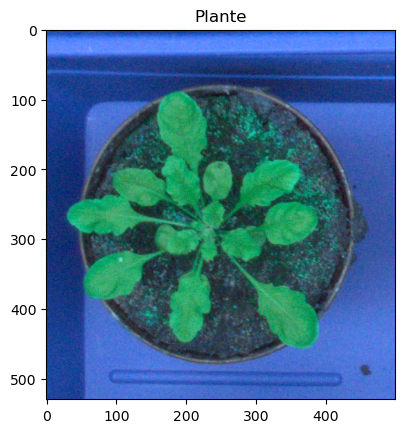

(530, 500, 3)


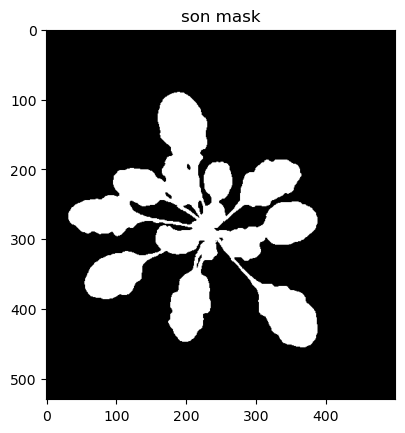

In [36]:
import matplotlib.pyplot as plt

img = cv2.imread(df_cases['image_file'][0])
print(np.shape(img))
plt.imshow(img)
plt.title(f"Plante")
    
# Show the plot
plt.show()

mask = cv2.imread(df_cases['mask_file'][0])
print(np.shape(mask))
plt.imshow(mask)
plt.title(f"son mask")
    
# Show the plot
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
import cv2

X=np.zeros((810,224,224,3), dtype=np.uint8)
Y= np.zeros((810,224,224,3))
X = np.array(X)
Y = np.array(Y)
for i in range(0,810):
    image = cv2.imread(df['image_file'][i])
    #bgr_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Convertir l'image en tableau numpy
    #image_array = np.array(image)
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# Convert to grayscale
    resized= cv2.resize(image, (224, 224))
    X[i]=resized
    #plt.imshow(resized_image)
    #plt.show()
    #X[i] = resized_image
    mask = cv2.imread(df['mask_file'][i])
    resized_mask= cv2.resize(mask, (224, 224))
    Y[i]=resized_mask
    #plt.imshow(X[0])
    #plt.show()

In [38]:
X.shape

(810, 224, 224, 3)

In [39]:
Y.shape

(810, 224, 224, 3)

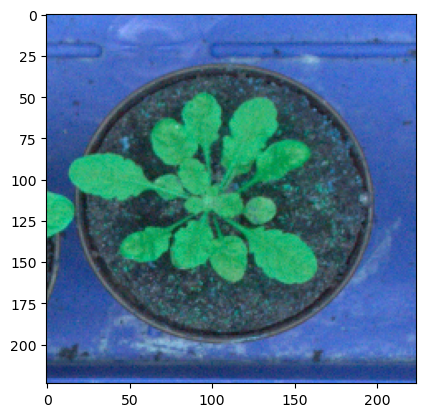

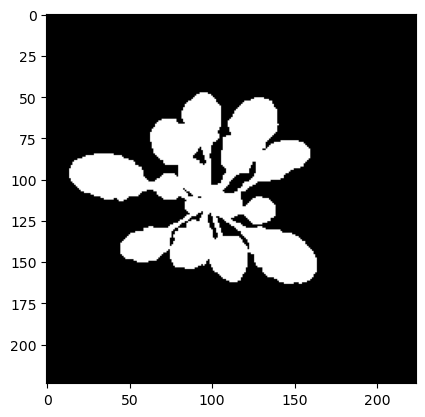

In [40]:
plt.imshow(X[100])
plt.show()

plt.imshow(Y[100])
plt.show()

In [41]:
#split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,shuffle = True,random_state=50)

In [42]:
print(np.shape(x_train),np.shape(y_train))
print(np.shape(x_test),np.shape(y_test))

(567, 224, 224, 3) (567, 224, 224, 3)
(243, 224, 224, 3) (243, 224, 224, 3)


In [43]:
x_train_v=np.reshape(x_train,[567,224,224,3])/255.
x_test_v=np.reshape(x_test,[243,224,224,3])/255.
print(np.shape(x_train_v))
print(np.shape(x_test_v))
y_train_v=np.reshape(y_train,[567,224,224,3])/255.
y_test_v=np.reshape(y_test,[243,224,224,3])/255.
print(np.shape(y_train_v))
print(np.shape(y_test_v))

(567, 224, 224, 3)
(243, 224, 224, 3)
(567, 224, 224, 3)
(243, 224, 224, 3)


In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def segmentation(input_shape):
    # Encoder
    inputs = Input(input_shape)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bridge
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)

    # Decoder
    up4 = concatenate([UpSampling2D(size=(2, 2))(conv3), conv2], axis=-1)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(up4)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)

    up5 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv1], axis=-1)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(up5)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)

    # Output
    output = Conv2D(1, 1, activation='sigmoid')(conv5)

    # Create the model
    model = Model(inputs=inputs, outputs=output)
    return model

In [45]:
input_shape = (224, 224, 3)
model2 = segmentation(input_shape)
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_4 (Conv2D)              (None, 224, 224, 64  36928       ['conv2d_3[0][0]']               
                                )                                                             

In [46]:
import numpy as np

# Convert true labels to single channel
y_train_v = np.expand_dims(y_train_v[:, :, :, 0], axis=-1)
y_test_v = np.expand_dims(y_test_v[:, :, :, 0], axis=-1)

In [47]:
from tensorflow.keras.optimizers import Adam

# Define the input shape of your images
input_shape = (224, 224, 3)

# Create the U-Net model
model2 = segmentation(input_shape)

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
hist1 = model2.fit(x_train_v, y_train_v, batch_size=32, epochs=50, validation_data=(x_test_v, y_test_v))

Epoch 1/50
18/18 [==============================] - 56s 2s/step - loss: 0.5920 - accuracy: 0.8068 - val_loss: 0.2505 - val_accuracy: 0.8321
Epoch 2/50
18/18 [==============================] - 16s 908ms/step - loss: 0.1618 - accuracy: 0.8668 - val_loss: 0.1328 - val_accuracy: 0.9592
Epoch 3/50
18/18 [==============================] - 15s 866ms/step - loss: 0.0955 - accuracy: 0.9604 - val_loss: 0.0860 - val_accuracy: 0.9644
Epoch 4/50
18/18 [==============================] - 16s 871ms/step - loss: 0.0709 - accuracy: 0.9672 - val_loss: 0.1255 - val_accuracy: 0.9230
Epoch 5/50
18/18 [==============================] - 16s 913ms/step - loss: 0.0509 - accuracy: 0.9741 - val_loss: 0.0342 - val_accuracy: 0.9811
Epoch 6/50
18/18 [==============================] - 16s 913ms/step - loss: 0.0448 - accuracy: 0.9773 - val_loss: 0.0392 - val_accuracy: 0.9798
Epoch 7/50
18/18 [==============================] - 16s 910ms/step - loss: 0.0343 - accuracy: 0.9812 - val_loss: 0.0327 - val_accuracy: 0.9813
Ep

8/8 [==============================] - 2s 225ms/step - loss: 0.0129 - accuracy: 0.9879


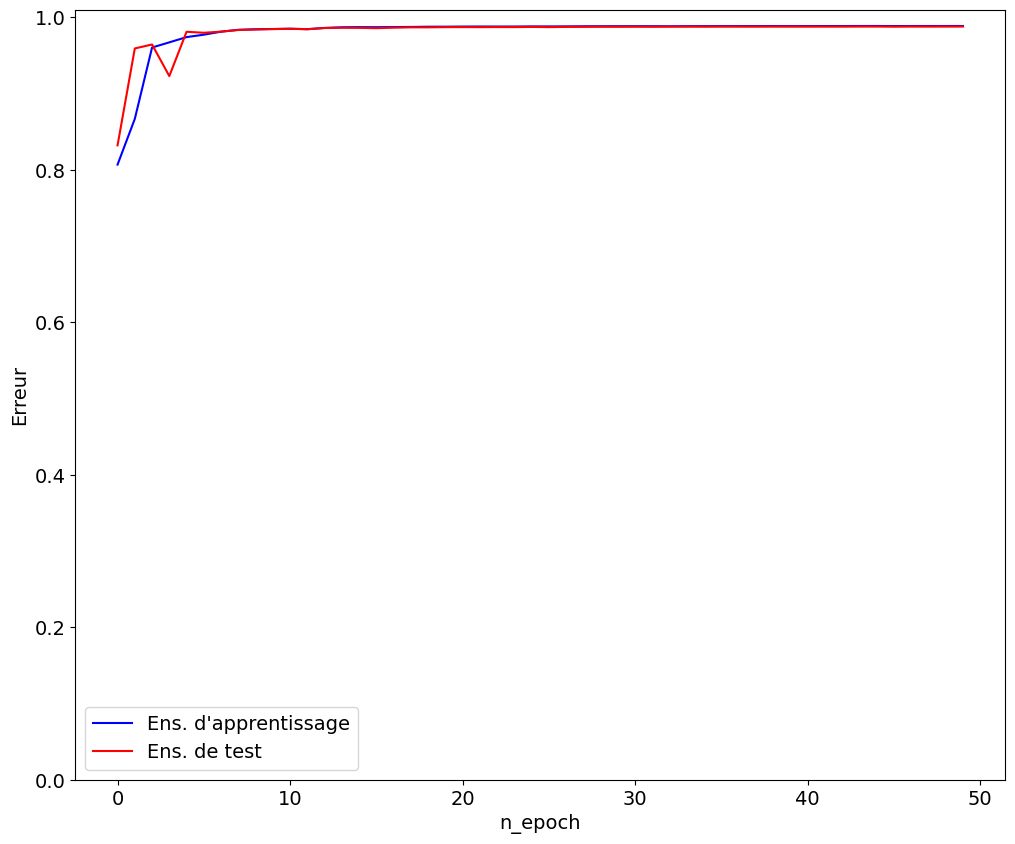

In [48]:
results1= model2.evaluate(x_test_v,y_test_v)

#print("results:\n loss:", results[0],"\naccuracy:",results[1],"\nprecision:",results[2],"\nrecall:",results[3],"\nAUC:",)

plt.rcParams["figure.figsize"] = [12., 10.]
plt.rcParams.update({'font.size': 14})
plt.plot(hist1.history["accuracy"],c='b',label="Ens. d'apprentissage")
plt.plot(hist1.history["val_accuracy"],c='r',label="Ens. de test")
plt.xlabel("n_epoch")
plt.ylabel("Erreur")
plt.ylim([0,1.01])
plt.legend()
plt.show()

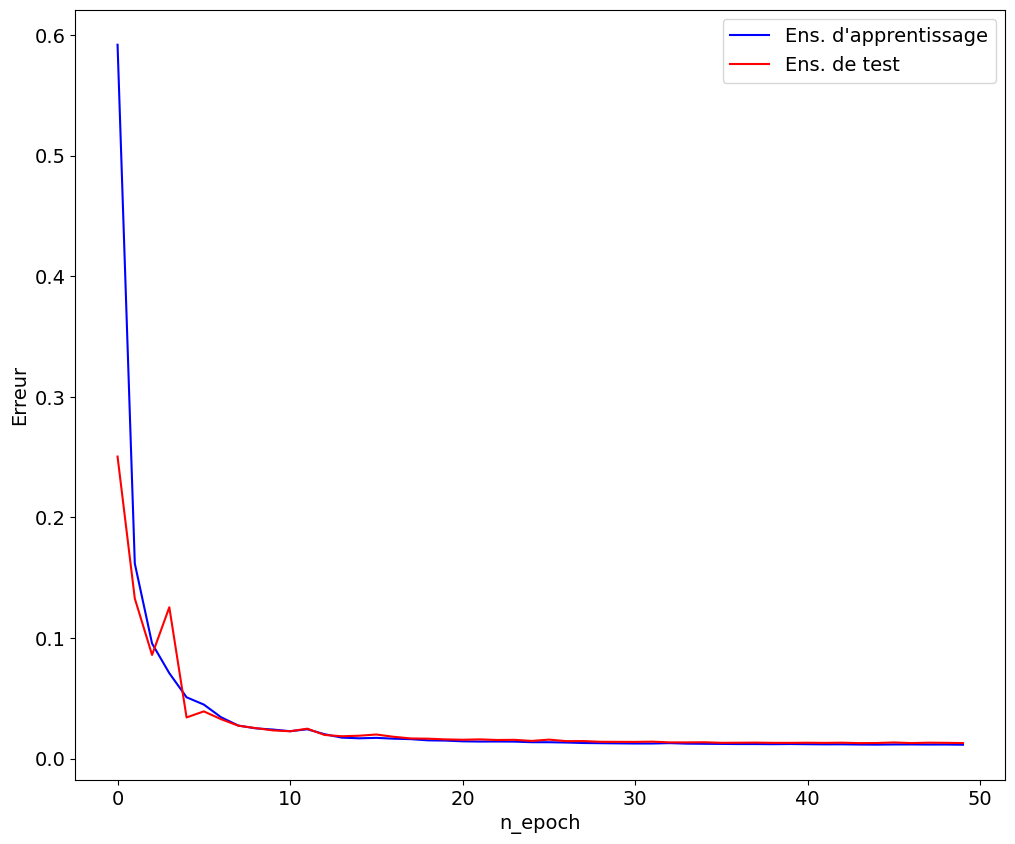

In [49]:
plt.rcParams["figure.figsize"] = [12., 10.]
plt.rcParams.update({'font.size': 14})
plt.plot(hist1.history["loss"],c='b',label="Ens. d'apprentissage")
plt.plot(hist1.history["val_loss"],c='r',label="Ens. de test")
plt.xlabel("n_epoch")
plt.ylabel("Erreur")
#plt.ylim([0,0.25])
plt.legend()
plt.show()

In [50]:
model2.save("surafce_counting_model.h5")

In [ ]:
from keras.models import load_model
model = load_model("/kaggle/input/surface-counting-model/surafce_counting_model.h5")

In [51]:
#from keras.preprocessing.image import image
import numpy as np
from PIL import Image

img = Image.open('/kaggle/input/imgplant/pngtree-top-of-leaf-chilli-pepper-green-fresh-no-background-png-image_3393198.jpg')
img_arr = np.array(img.resize((224,224)))/255
img_arr = np.expand_dims(img_arr, axis=0)  # add a batch dimension

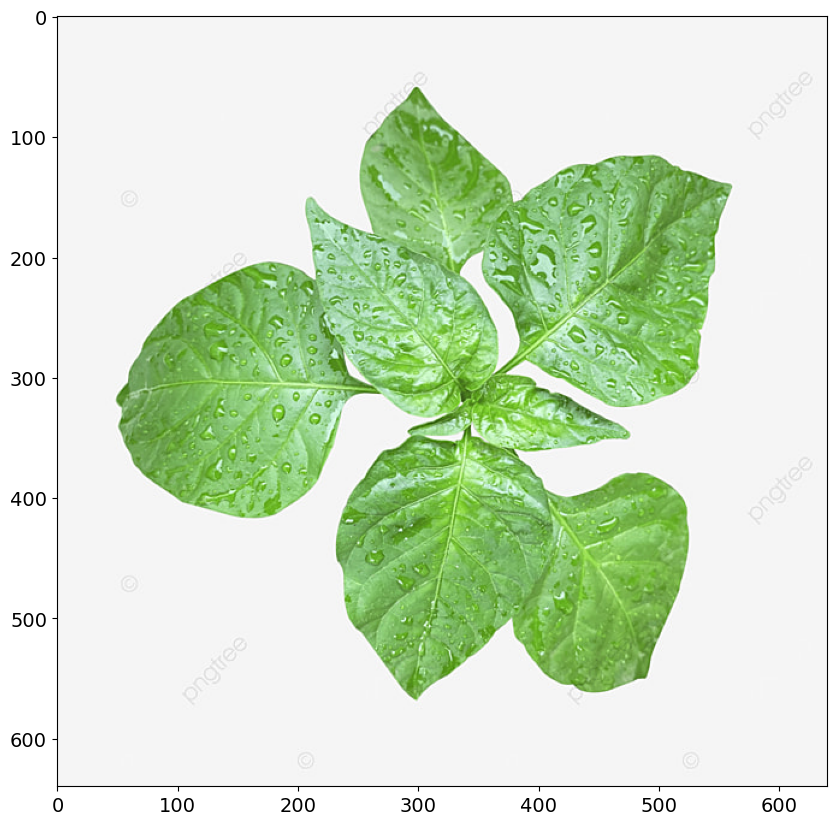

In [52]:
plt.imshow(img)

In [53]:
mask = model2.predict(img_arr)

1/1 [==============================] - 1s 1s/step


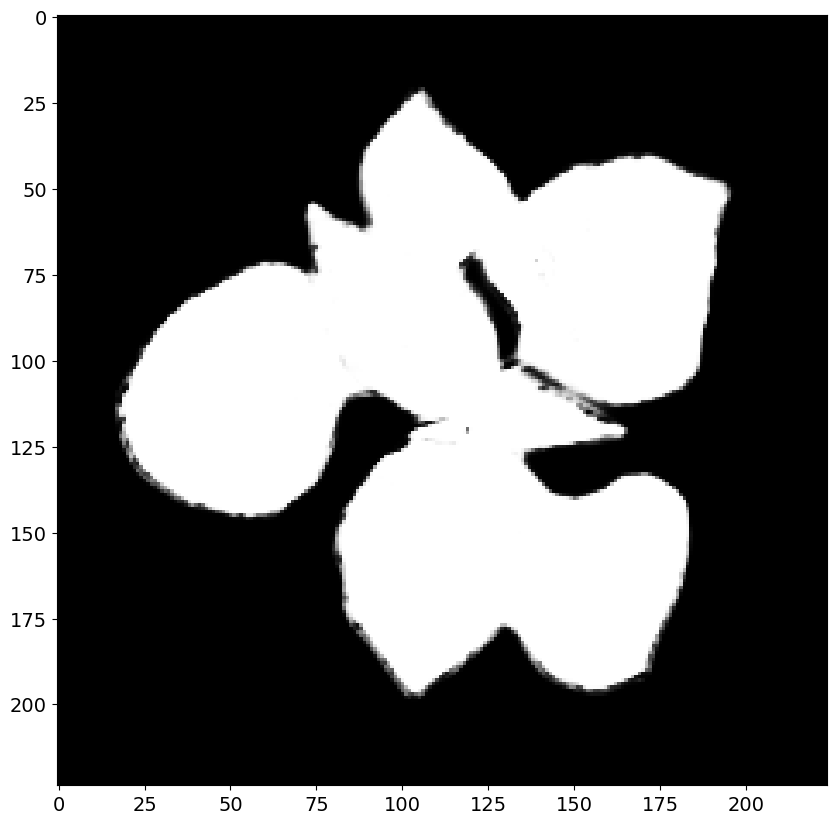

In [54]:
mask = mask.squeeze()  # Remove singleton dimensions
plt.imshow(mask, cmap='gray')  # Display the image
plt.show()

In [55]:
import cv2
import numpy as np

def calculate_leaf_area(mask):
    # Convert the mask to grayscale
    gray_mask = np.uint8(mask * 255)  # Convert the mask values to 0-255 range
    _, binary_mask = cv2.threshold(gray_mask, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate leaf area
    leaf_area = 0
    MIN_CONTOUR_AREA = 100
    for contour in contours:
        # Calculate the area of each contour
        contour_area = cv2.contourArea(contour)

        # Include contours that are large enough (assuming the large maize plant)
        if contour_area > MIN_CONTOUR_AREA:
            leaf_area += contour_area

    return leaf_area

In [56]:
leaf_area = calculate_leaf_area(mask)
print("Leaf Area:", leaf_area)

Leaf Area: 17226.0


In [57]:
#from keras.preprocessing.image import image
import numpy as np
from PIL import Image

img1 = Image.open('/kaggle/input/plantesurface/gros-plan-plant-mais-feuilles-vertes-mot-mais-dessus_375908-11723.jpg')
img_arr1 = np.array(img1.resize((224,224)))/255
img_arr1 = np.expand_dims(img_arr1, axis=0)  # add a batch dimension

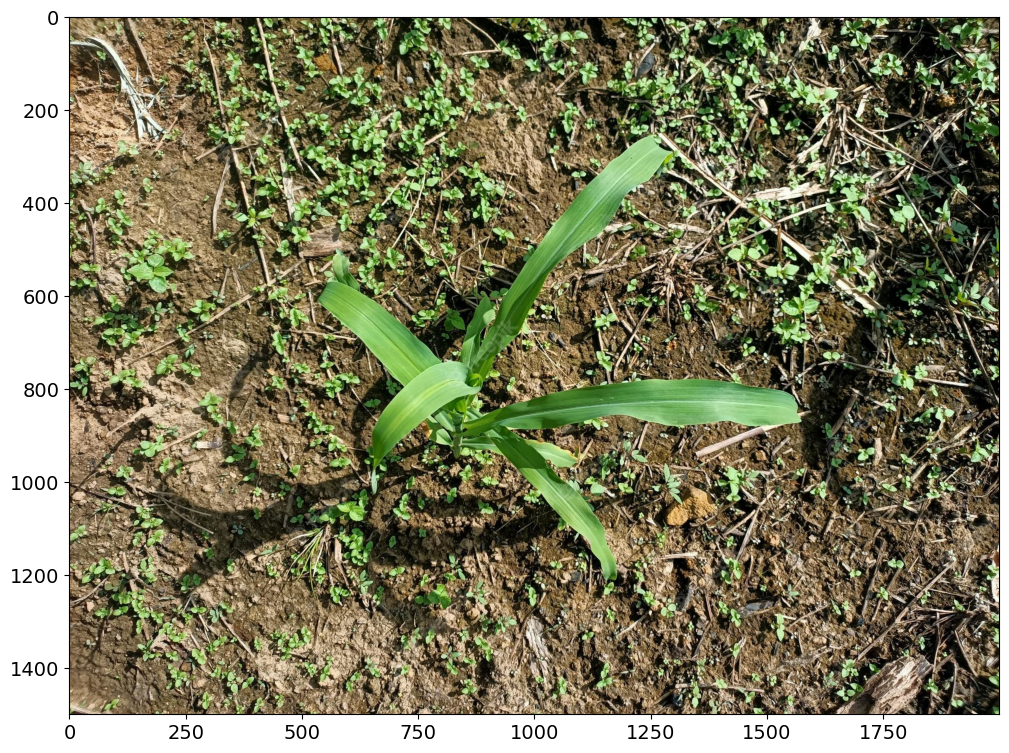

In [58]:
plt.imshow(img1)

In [59]:
mask1 = model2.predict(img_arr1)

1/1 [==============================] - 0s 22ms/step


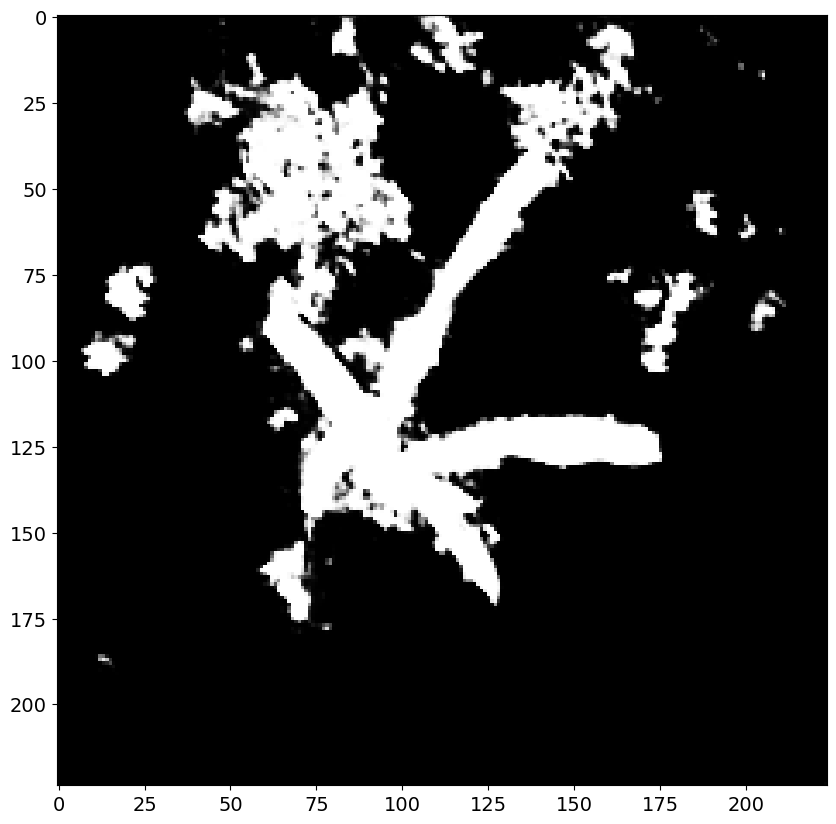

In [60]:
mask1 = mask1.squeeze()  # Remove singleton dimensions
plt.imshow(mask1, cmap='gray')  # Display the image
plt.show()

In [61]:
leaf_area1 = calculate_leaf_area(mask1)
print("Leaf Area:", leaf_area1)

Leaf Area: 6440.5


# Croissance

In [62]:
import glob
dataset_path = '/kaggle/input/croissancedataset/Annotated Image/*/*'
xlsx_files = glob.glob(os.path.join(dataset_path,"*.xlsx"))
image_files = glob.glob(os.path.join(dataset_path,"*Anno.png"))
xlsx_files
image_files

['/kaggle/input/croissancedataset/Annotated Image/Plant_191-28/SideView0/Day_025_Anno.png',
 '/kaggle/input/croissancedataset/Annotated Image/Plant_191-28/SideView0/Day_011_Anno.png',
 '/kaggle/input/croissancedataset/Annotated Image/Plant_191-28/SideView0/Day_029_Anno.png',
 '/kaggle/input/croissancedataset/Annotated Image/Plant_191-28/SideView0/Day_008_Anno.png',
 '/kaggle/input/croissancedataset/Annotated Image/Plant_191-28/SideView0/Day_007_Anno.png',
 '/kaggle/input/croissancedataset/Annotated Image/Plant_191-28/SideView0/Day_003_Anno.png',
 '/kaggle/input/croissancedataset/Annotated Image/Plant_191-28/SideView0/Day_014_Anno.png',
 '/kaggle/input/croissancedataset/Annotated Image/Plant_191-28/SideView0/Day_031_Anno.png',
 '/kaggle/input/croissancedataset/Annotated Image/Plant_191-28/SideView0/Day_024_Anno.png',
 '/kaggle/input/croissancedataset/Annotated Image/Plant_191-28/SideView0/Day_006_Anno.png',
 '/kaggle/input/croissancedataset/Annotated Image/Plant_191-28/SideView0/Day_016

In [63]:
import pandas as pd

# Chemin et nom de fichier pour le fichier XLSX
xlsx_file = "/kaggle/input/croissancedataset/Annotated Image/Plant_001-9/SideView90/Plant_001-9 SideView90_All.xlsx"

# Charger le fichier XLSX en tant que DataFrame
df = pd.read_excel(xlsx_file)

# Afficher les premières lignes du DataFrame
print(df.head())

   Day                                               Path  Stem Angle  \
0    4  D:\sri\Research\PlantMethodsPaper\Input\Plants...         NaN   
1    6  D:\sri\Research\PlantMethodsPaper\Input\Plants...         NaN   
2    9  D:\sri\Research\PlantMethodsPaper\Input\Plants...         NaN   
3   10  D:\sri\Research\PlantMethodsPaper\Input\Plants...         NaN   
4   11  D:\sri\Research\PlantMethodsPaper\Input\Plants...         NaN   

                                             NodesYX  Number Of Leafs  
0                              [1839 1302;1782 1313]                2  
1                    [1839 1302;1770 1305;1724 1293]                3  
2                    [1839 1302;1791 1304;1676 1282]                3  
3                    [1839 1302;1794 1300;1681 1283]                3  
4  [1839 1302;1837 1299;1796 1302;1671 1285;1570 ...                5  


In [64]:
os.listdir('/kaggle/input/croissancedataset/Annotated Image')

['Plant_191-28',
 'Plant_045-1',
 'Plant_001-9',
 'Plant_047-25',
 'Plant_016-20',
 'Plant_071-8',
 'Plant_008-19',
 'Plant_063-32',
 'Plant_006-25',
 'Plant_076-24',
 'Plant_023-1',
 'Plant_104-24',
 'Plant_070-11']

In [56]:
#rm -r '/kaggle/working/croissanceData.csv'

In [65]:
df_croissance = pd.DataFrame(columns=['plant','image','day', 'number of leafs'])
for filename in os.listdir('/kaggle/input/croissancedataset/Annotated Image'):
    plant = filename
    print('hadi plant',plant)
    for file in xlsx_files:
        #print(file.split('/')[5])
        if (file.split('/')[5] == plant):
            print(file)
            df = pd.read_excel(file)
            for index, row in df.iterrows():
                image_id = row['Path'].split('_')[-1].split('.')[0]
                for image in image_files:
                    if (image.split('/')[-1].split('_')[-1]=='Anno.png' and image_id == image.split('/')[-1].split('_')[-2] and image.split('/')[-3] == plant):
                        new_row = {
                           'plant': plant,
                           'image' : image,
                           'day' : row['Day'],
                           'number of leafs' : row['Number Of Leafs']
                        }
                        # Convert the dictionary to a DataFrame with one row
                        new_row_df = pd.DataFrame(new_row, index=[0])
                    
                        df_croissance = pd.concat([df_croissance, new_row_df], ignore_index=True)
                    else: 
                        pass
        else: 
            pass

# Save the new DataFrame to a CSV file
df_croissance.to_csv('croissanceData.csv', index=False)

hadi plant Plant_191-28
/kaggle/input/croissancedataset/Annotated Image/Plant_191-28/SideView0/Plant_191-28 SideView0_All.xlsx
hadi plant Plant_045-1
/kaggle/input/croissancedataset/Annotated Image/Plant_045-1/SideView0/Plant_045-1 SideView0_All.xlsx
hadi plant Plant_001-9
/kaggle/input/croissancedataset/Annotated Image/Plant_001-9/SideView90/Plant_001-9 SideView90_All.xlsx
hadi plant Plant_047-25
/kaggle/input/croissancedataset/Annotated Image/Plant_047-25/SideView0/Plant_047-25 SideView0_All.xlsx
hadi plant Plant_016-20
/kaggle/input/croissancedataset/Annotated Image/Plant_016-20/SideView0/Plant_016-20 SideView0_All.xlsx
hadi plant Plant_071-8
/kaggle/input/croissancedataset/Annotated Image/Plant_071-8/SideView90/Plant_071-8 SideView90_All.xlsx
hadi plant Plant_008-19
/kaggle/input/croissancedataset/Annotated Image/Plant_008-19/SideView90/Plant_008-19 SideView90_All.xlsx
hadi plant Plant_063-32
/kaggle/input/croissancedataset/Annotated Image/Plant_063-32/SideView0/Plant_063-32 SideVi

In [66]:
df_croissance.head(-1)

plant                                              image day  \
0    Plant_191-28  /kaggle/input/croissancedataset/Annotated Imag...   3   
1    Plant_191-28  /kaggle/input/croissancedataset/Annotated Imag...   4   
2    Plant_191-28  /kaggle/input/croissancedataset/Annotated Imag...   5   
3    Plant_191-28  /kaggle/input/croissancedataset/Annotated Imag...   6   
4    Plant_191-28  /kaggle/input/croissancedataset/Annotated Imag...   7   
..            ...                                                ...  ..   
357  Plant_070-11  /kaggle/input/croissancedataset/Annotated Imag...  27   
358  Plant_070-11  /kaggle/input/croissancedataset/Annotated Imag...  28   
359  Plant_070-11  /kaggle/input/croissancedataset/Annotated Imag...  29   
360  Plant_070-11  /kaggle/input/croissancedataset/Annotated Imag...  30   
361  Plant_070-11  /kaggle/input/croissancedataset/Annotated Imag...  31   

    number of leafs  
0                 2  
1                 2  
2                 3  
3                 3  
4                 3  
..              ...  
357               7  
358               7  
359               5  
360               8  
361               6  

[362 rows x 4 columns]

In [94]:
#rm -r '/kaggle/working/mis_a_jour.csv'

In [67]:
def function(csv_file):
    data = pd.read_csv(csv_file)
    data['croissance_feuilles'] = np.nan
    for plant in data['plant'].unique():
        indexes = []
        print(plant)
        for index,row in data.iterrows():
            if plant == data.iloc[index]['plant']:
                indexes.append(index)
            else:
                pass
        print(indexes)
        for i in indexes[1:]:
            for index,row in data.iterrows():
                if index == i and index in indexes:
                    value_feuilles = data.iloc[i]['number of leafs']-data.iloc[i-1]['number of leafs']
                    print(value_feuilles)
                    data.at[index, 'croissance_feuilles'] = value_feuilles
                    #data['croissance_surface'] = data['croissance_surface'].append(value_surface)
                    if value_feuilles < 0:
                        #print(index)
                        print('croissance anormal')
                    else:
                        #print(index)
                        print('croissance normal')
                else:
                    pass
    data.to_csv('/kaggle/working/mis_a_jour.csv', index=False)
    #data['croissance_surface'] = []
    #initialise_feuille = df_croissance.iloc[0]['number of leafs'] - df_croissance.iloc[1]['number of leafs']
    #initialise_surface = df_croissance.iloc[0]['surface'] - df_croissance.iloc[1]['surface']
    #for index,row in data.iterrows():
        #value_feuilles = data.iloc[index + 1]['number of leafs']-data.iloc[index]['number of leafs']
        #value_surface = (row+1)['surface']-initialise_surface
        #initialise_feuille = value_feuilles
        #initialise_surface = value_surface
        #data.at[index, 'croissance_feuilles'] = value_feuilles
        #data['croissance_surface'] = data['croissance_surface'].append(value_surface)
        #if value_feuilles < 0:
            #print(index)
            #print('croissance anormal')
        #else:
            #print(index)
            #print('croissance normal')

In [68]:
function('/kaggle/working/croissanceData.csv')

Plant_191-28
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
0
croissance normal
1
croissance normal
0
croissance normal
0
croissance normal
1
croissance normal
0
croissance normal
0
croissance normal
1
croissance normal
0
croissance normal
0
croissance normal
1
croissance normal
0
croissance normal
0
croissance normal
1
croissance normal
0
croissance normal
0
croissance normal
1
croissance normal
0
croissance normal
-1
croissance anormal
0
croissance normal
2
croissance normal
-1
croissance anormal
0
croissance normal
-2
croissance anormal
1
croissance normal
0
croissance normal
Plant_045-1
[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
1
croissance normal
0
croissance normal
0
croissance normal
0
croissance normal
0
croissance normal
1
croissance normal
0
croissance normal
1
croissance normal
-1
croissance anormal
1
croissance normal
0
croissance normal
0
crois

In [69]:
def plot_columns(df, column1, column2):
    for plant in df['plant'].unique():
        indexes = []
        print(plant)
        for index,row in data.iterrows():
            if plant == data.iloc[index]['plant']:
                indexes.append(index)
            else:
                pass
        x = []
        y = []
        for i in indexes[1:]:
            value_x = df.iloc[i][column1]
            x.append(value_x)
            value_y = df.iloc[i][column2]
            y.append(value_y)
        plt.scatter(x, y, color='red', label='Points')
        plt.plot(x, y, color='blue', linestyle='-', linewidth=1, label='Line')
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.title(f'Plot de {column1} par rapport à {column2}')

        # Add a legend
        plt.legend()

        # Show the plot
        plt.show()
        #plt.plot(x, y)
        #plt.xlabel(column1)
        #plt.ylabel(column2)
        #plt.title(f'Plot de {column1} par rapport à {column2}')
        #plt.show()

Plant_191-28


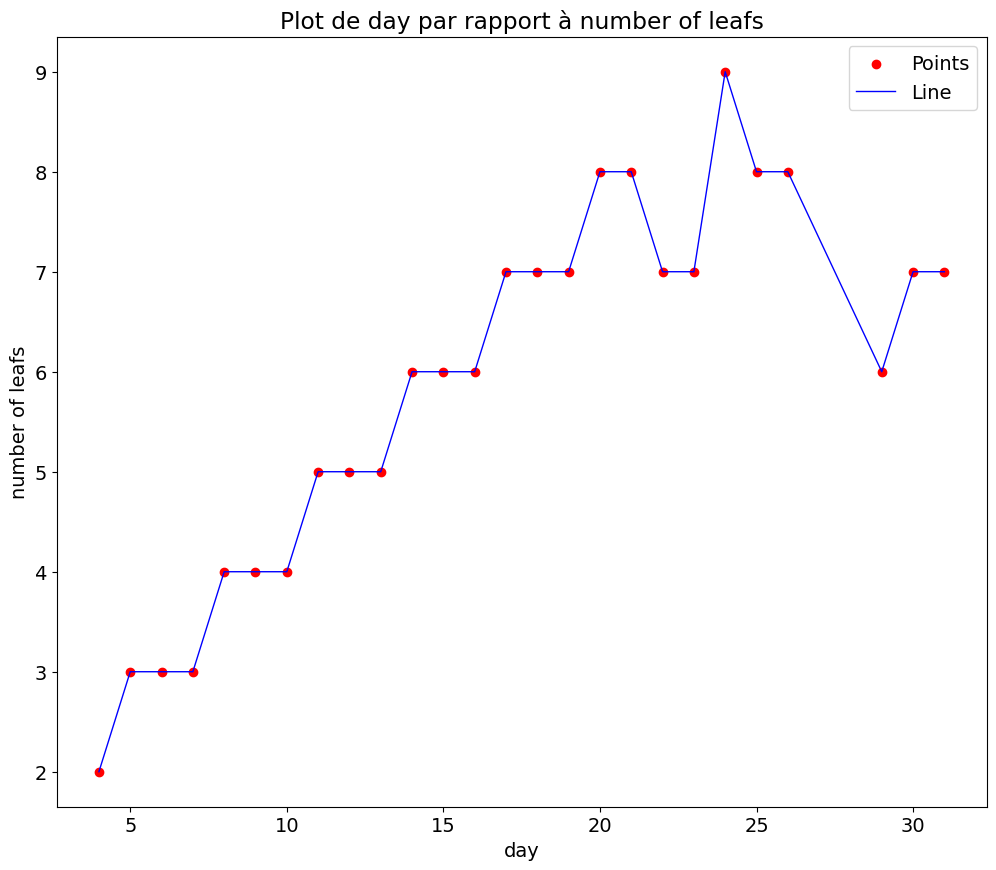

Plant_045-1


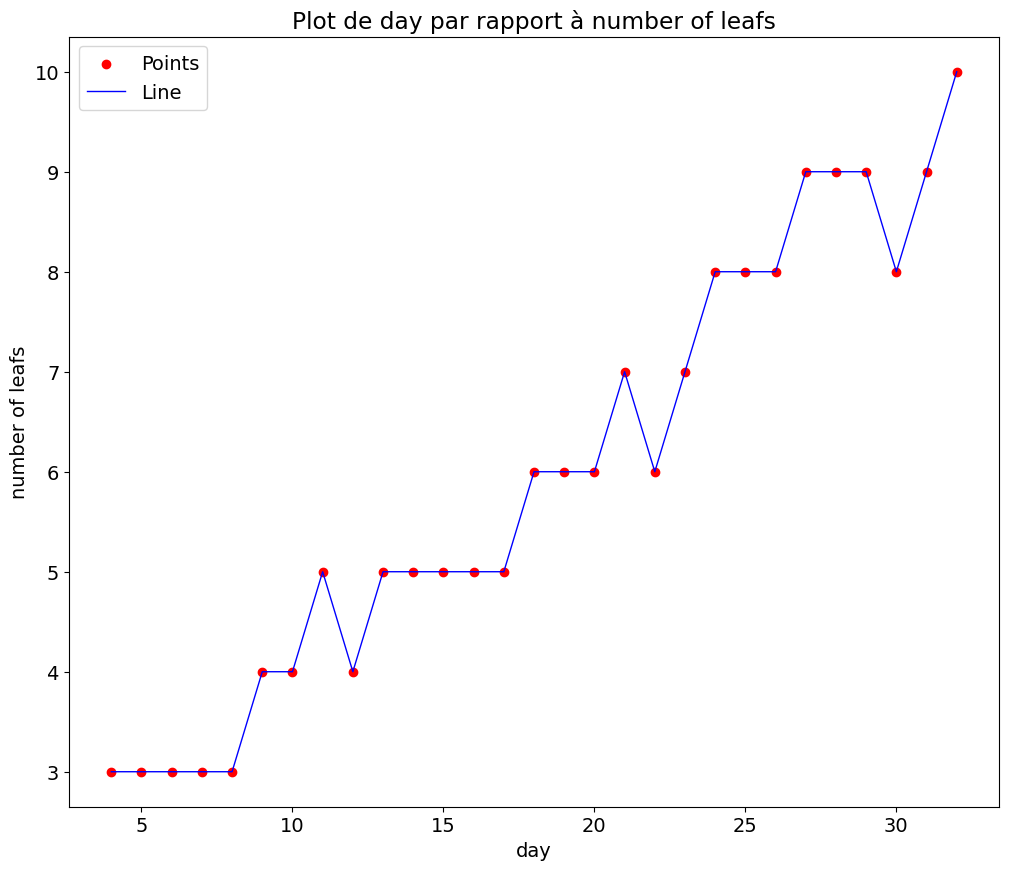

Plant_001-9


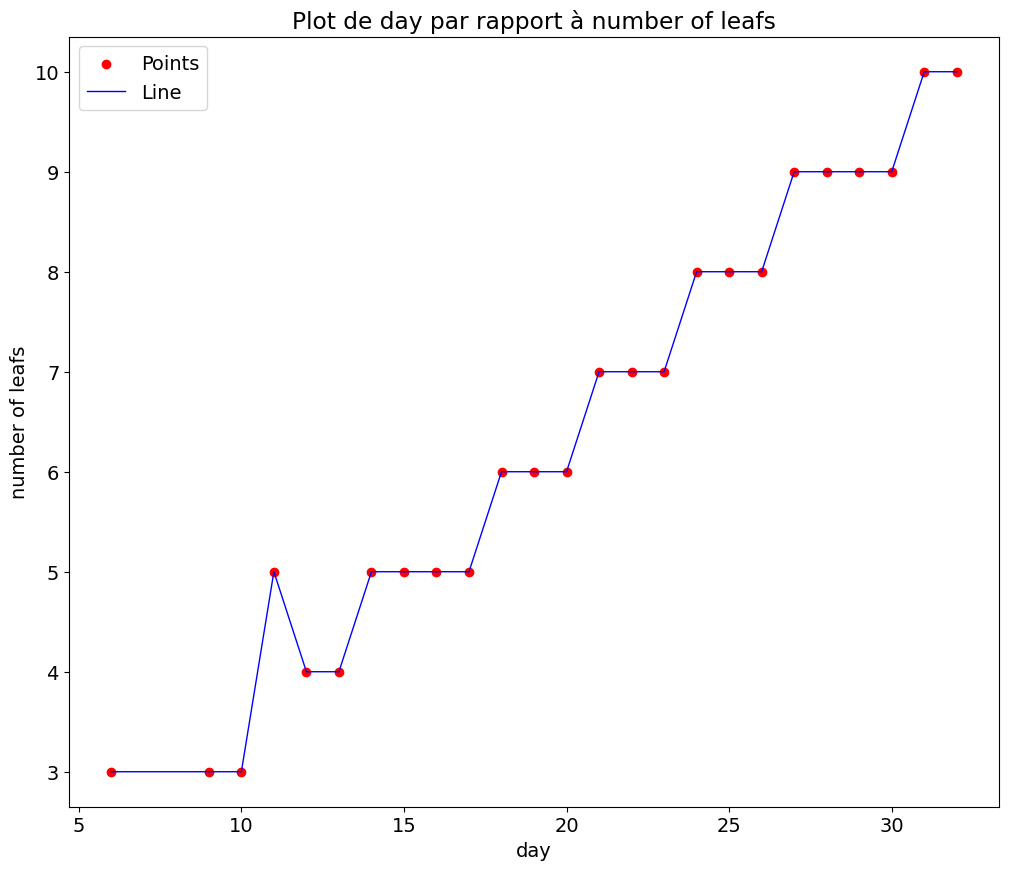

Plant_047-25


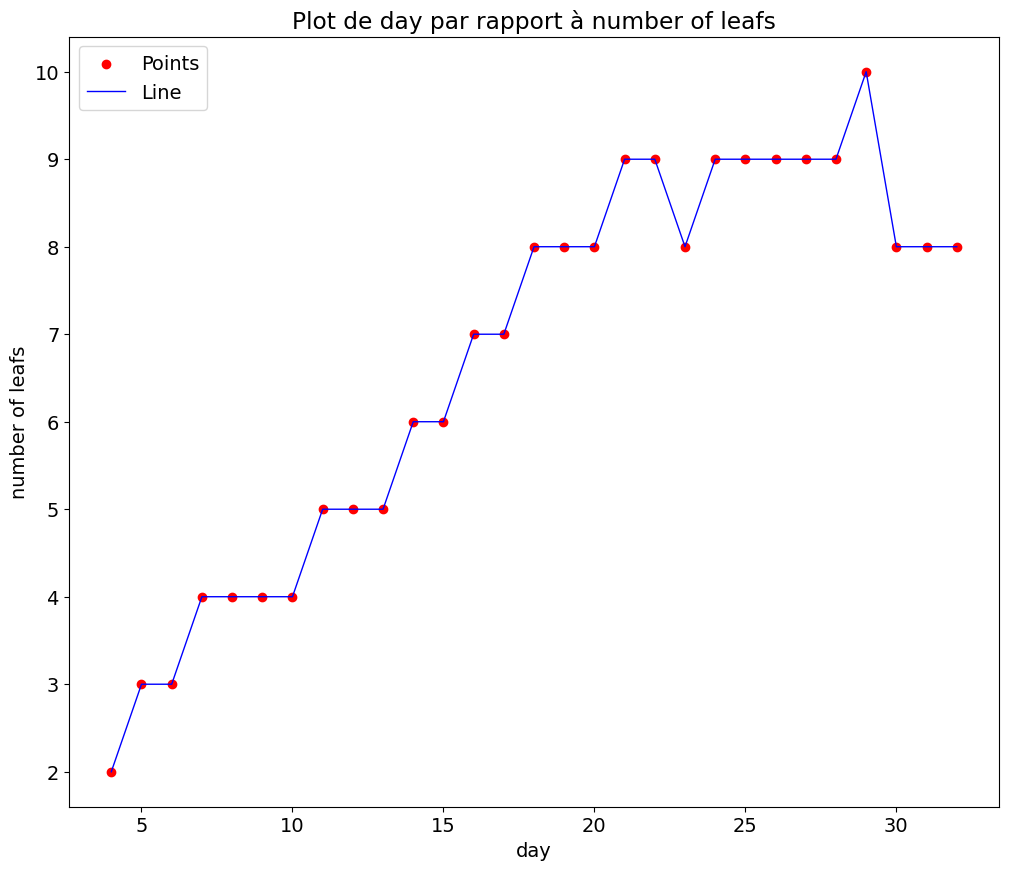

Plant_016-20


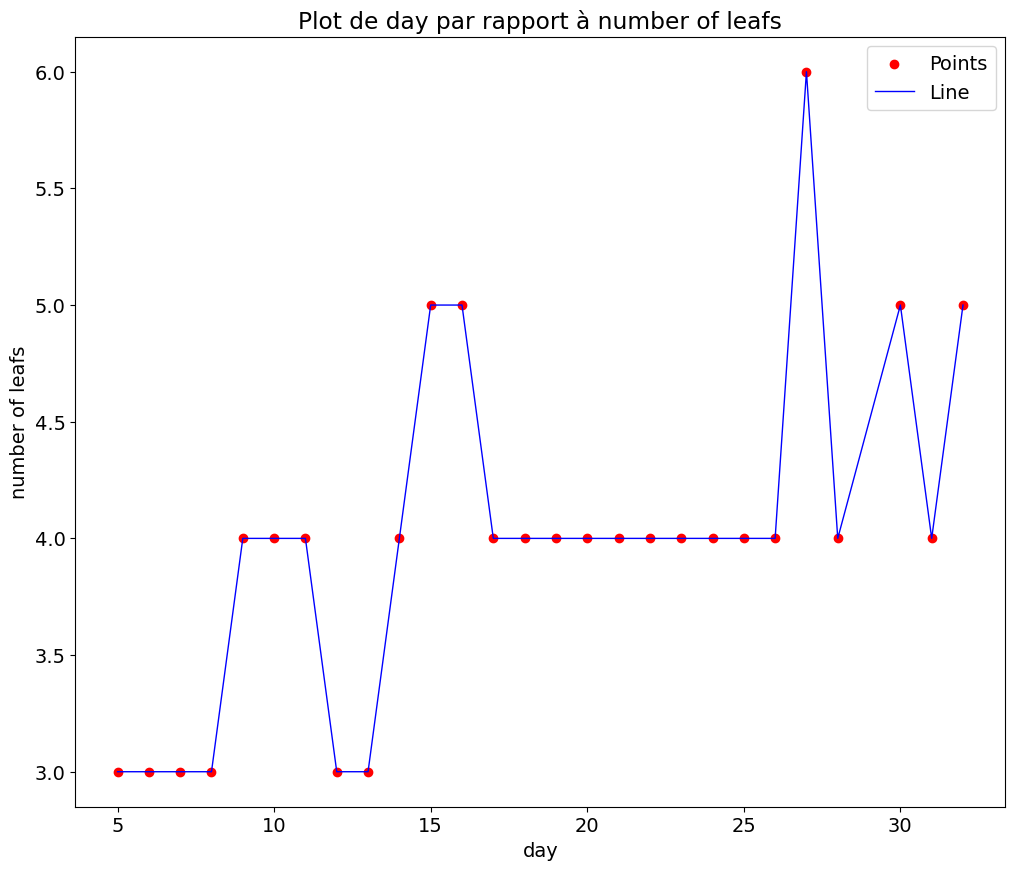

Plant_071-8


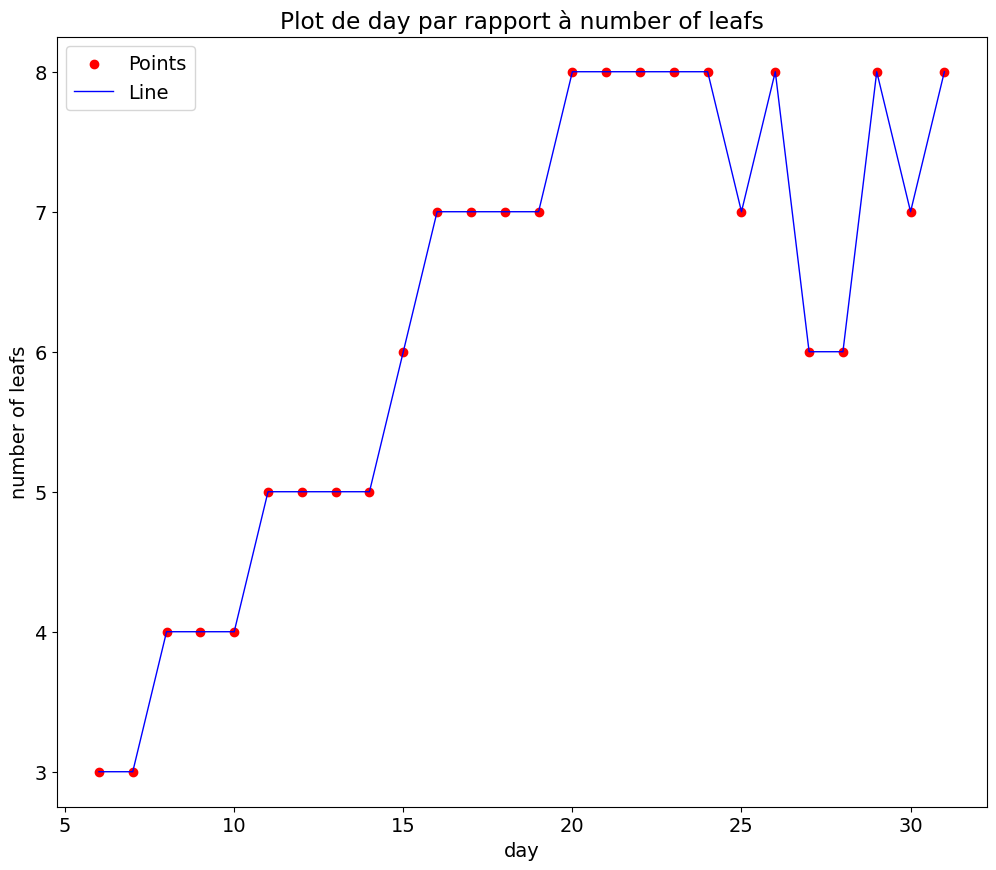

Plant_008-19


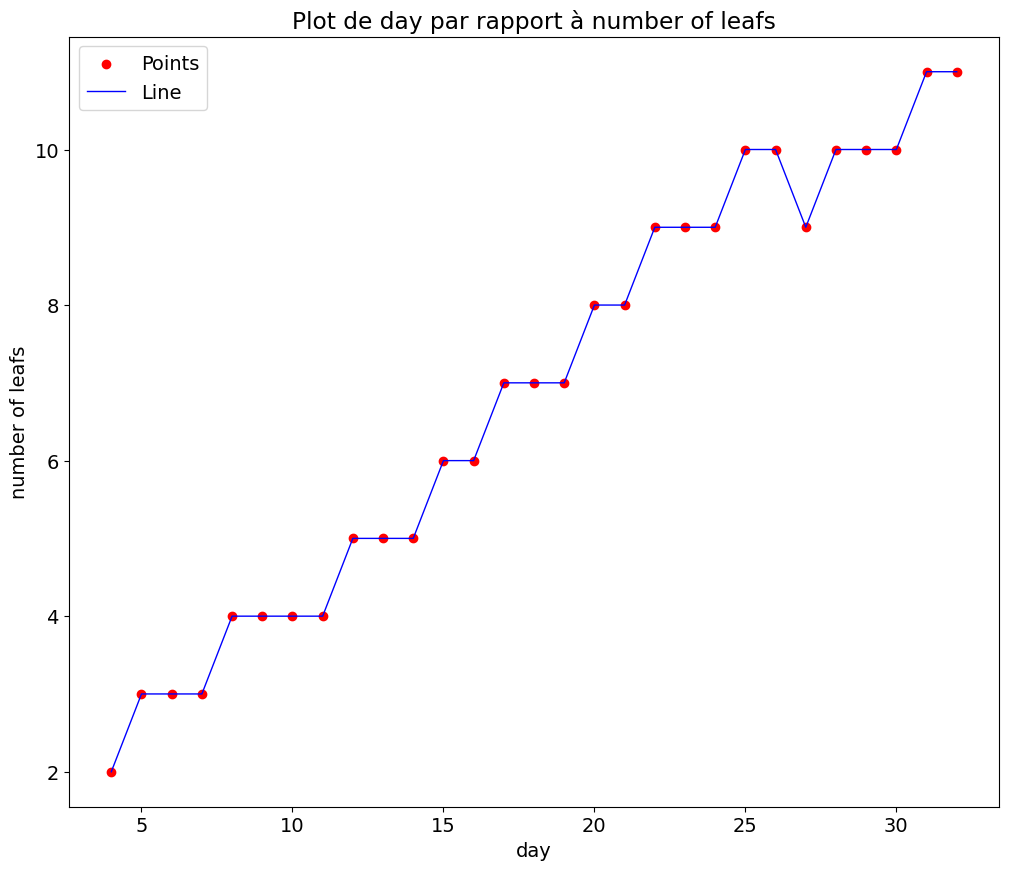

Plant_063-32


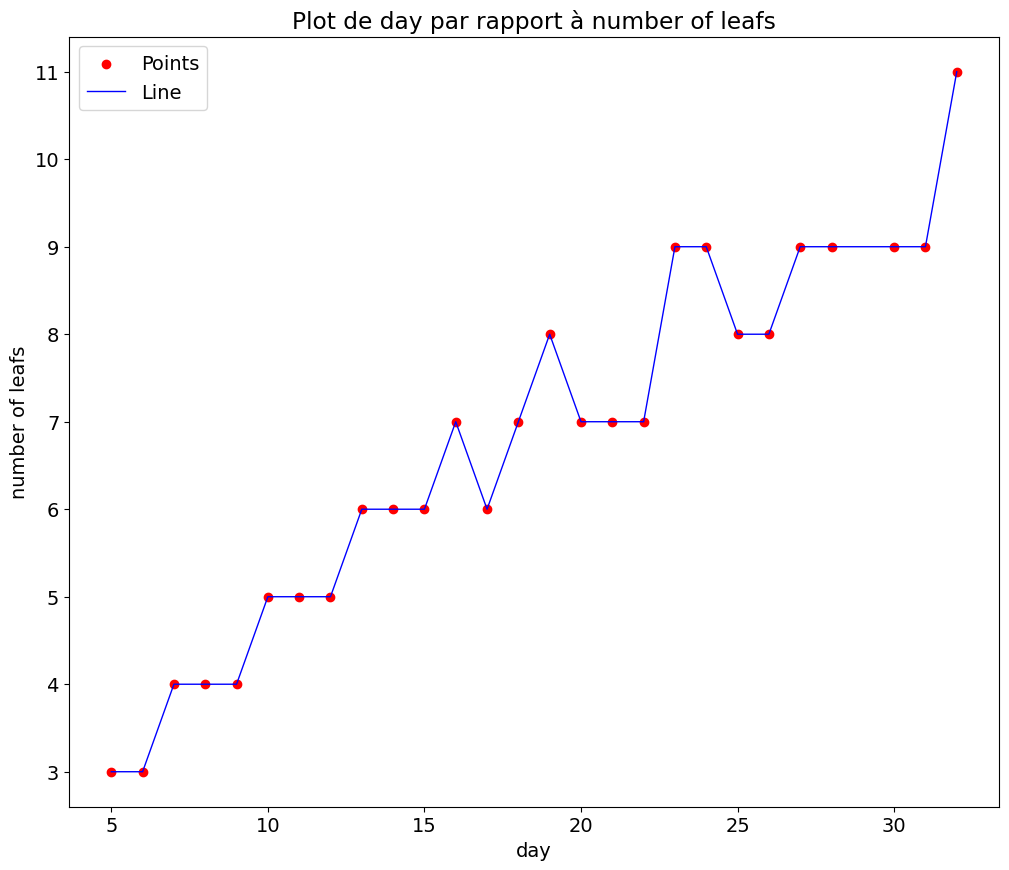

Plant_006-25


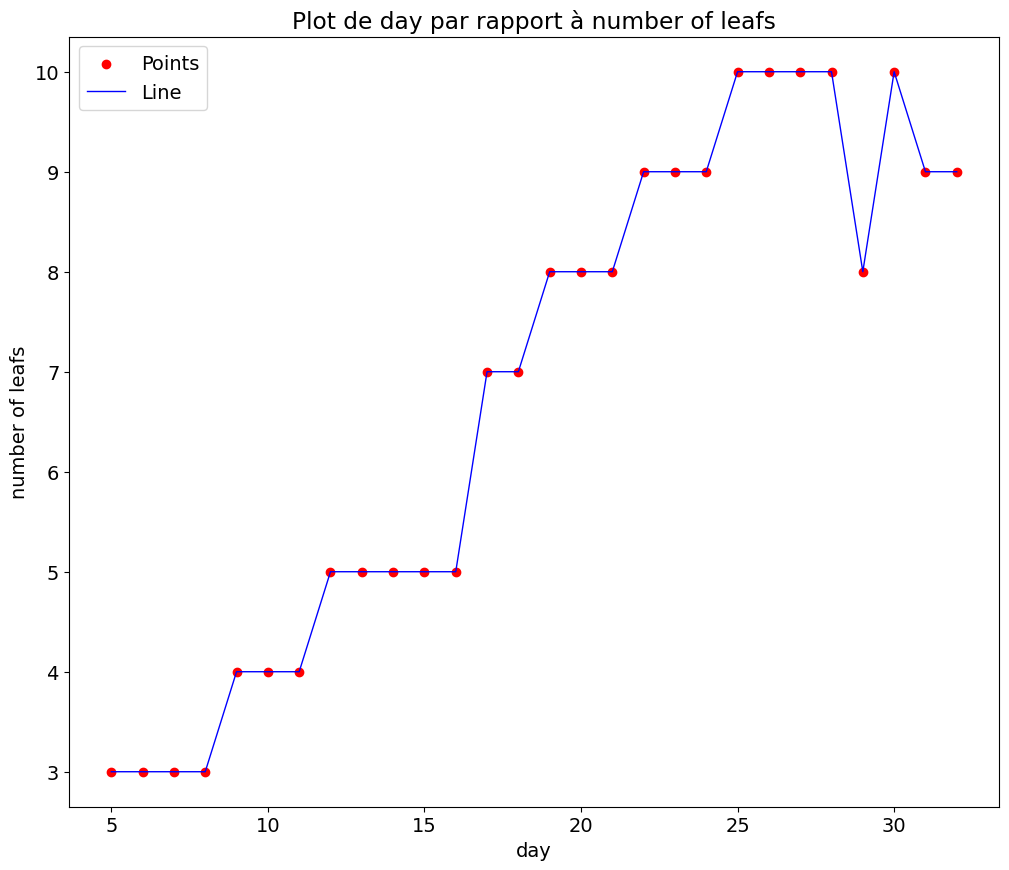

Plant_076-24


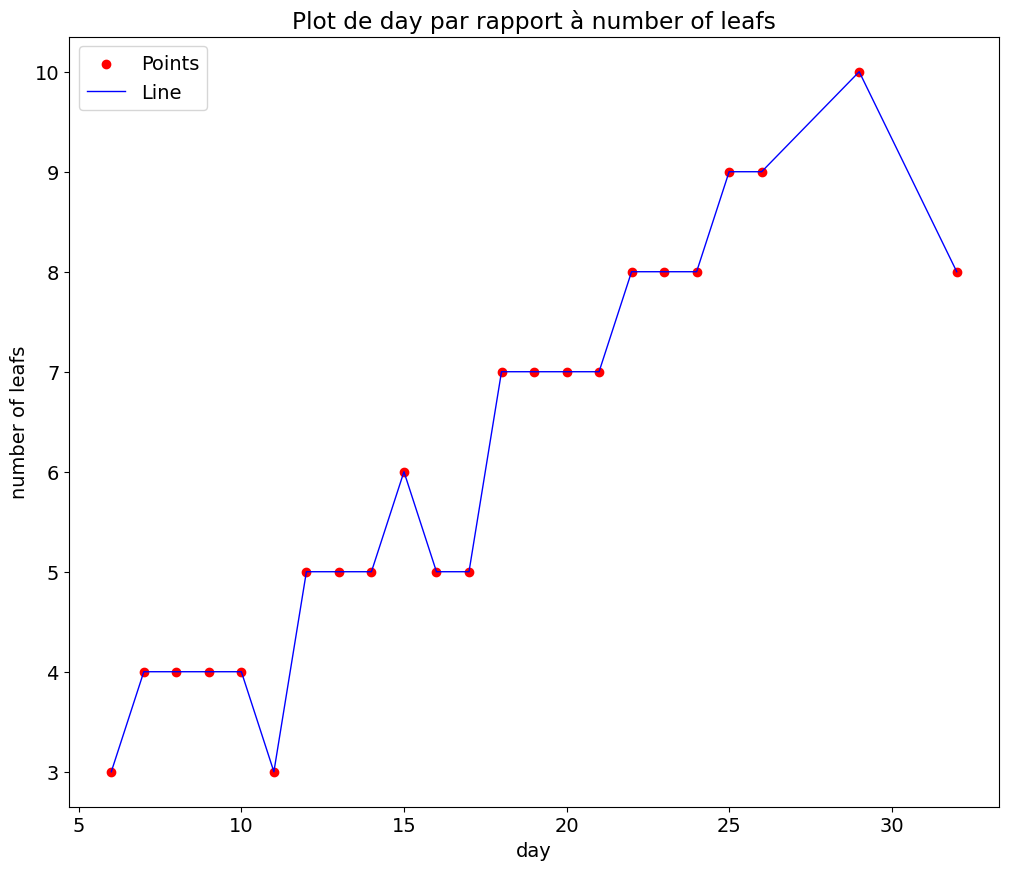

Plant_023-1


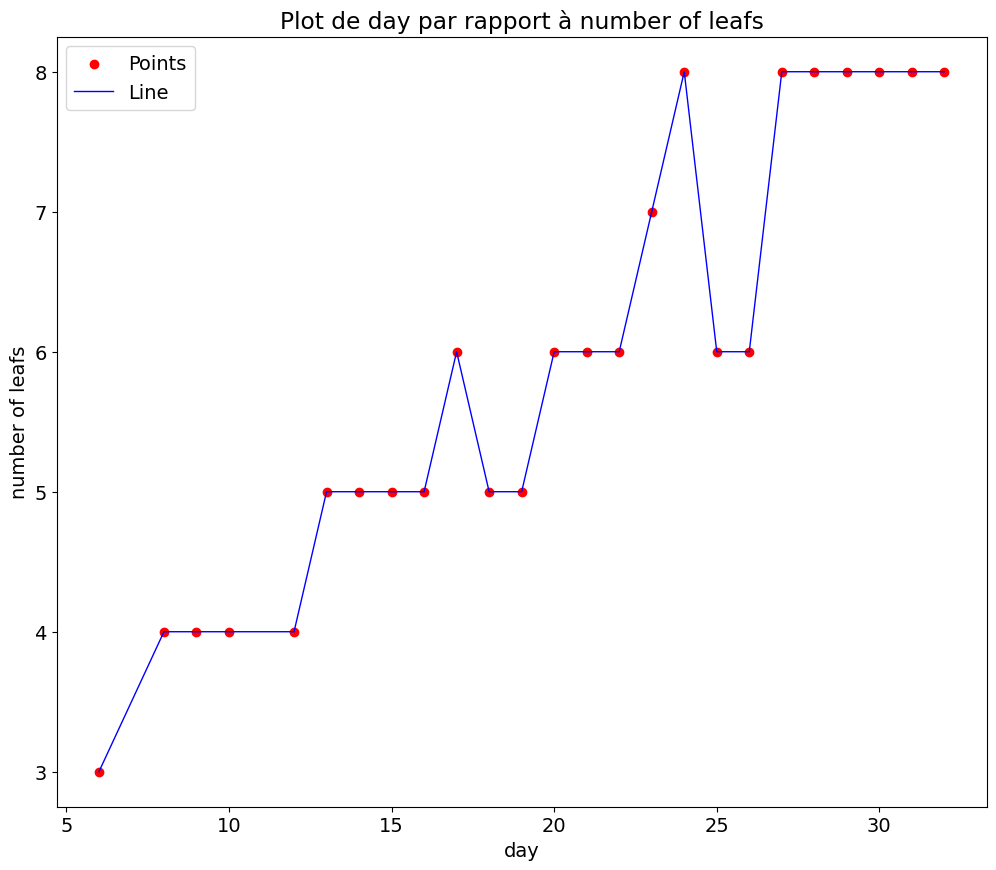

Plant_104-24


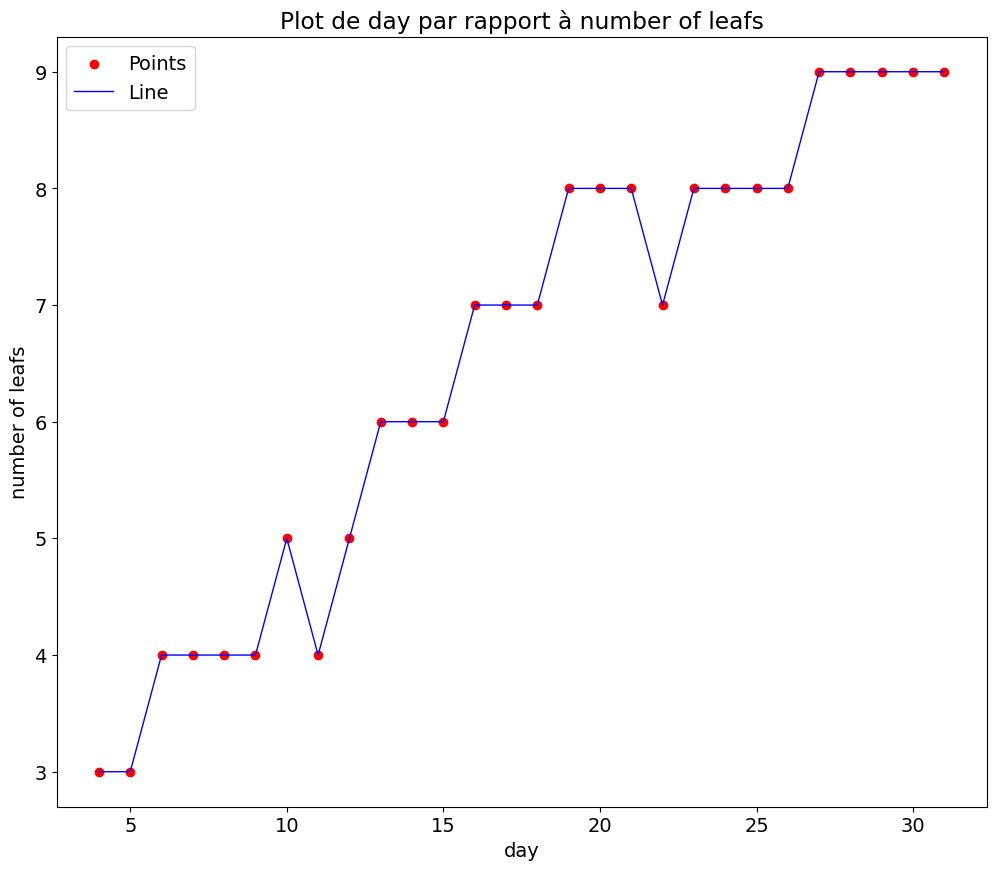

Plant_070-11


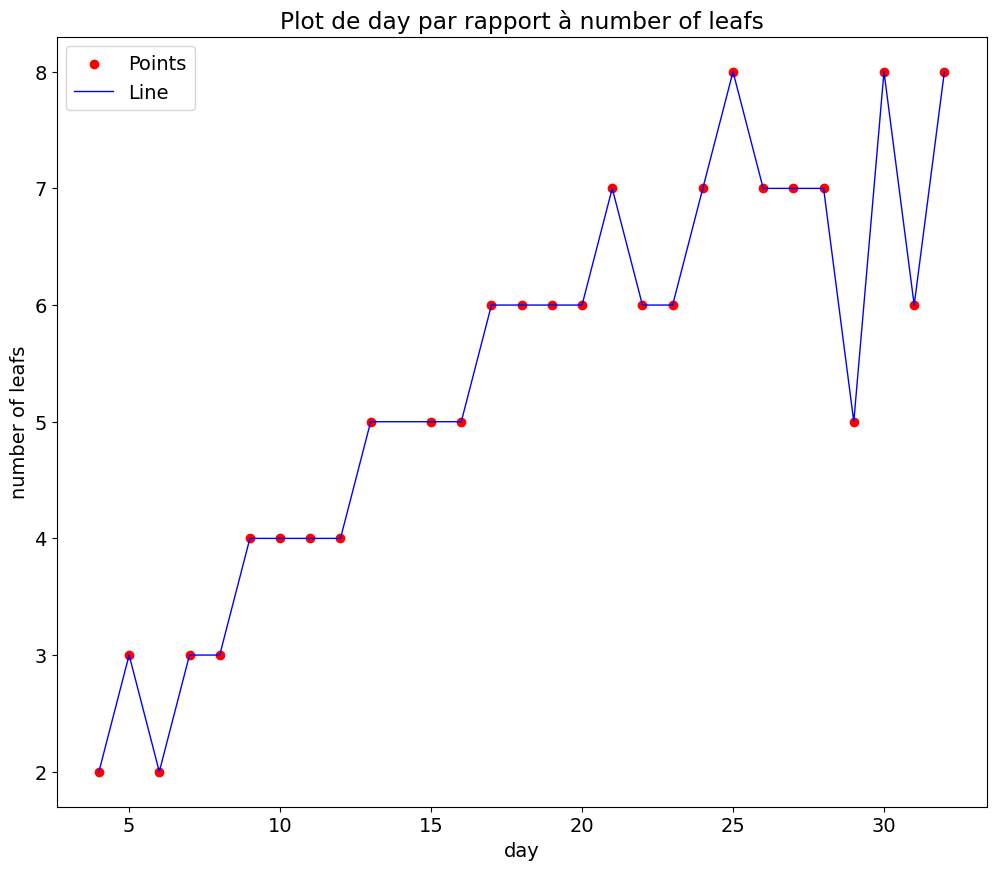

In [70]:
data = pd.read_csv('/kaggle/working/mis_a_jour.csv')
#data['plant']
plot_columns(data,'day','number of leafs')

Plant_191-28


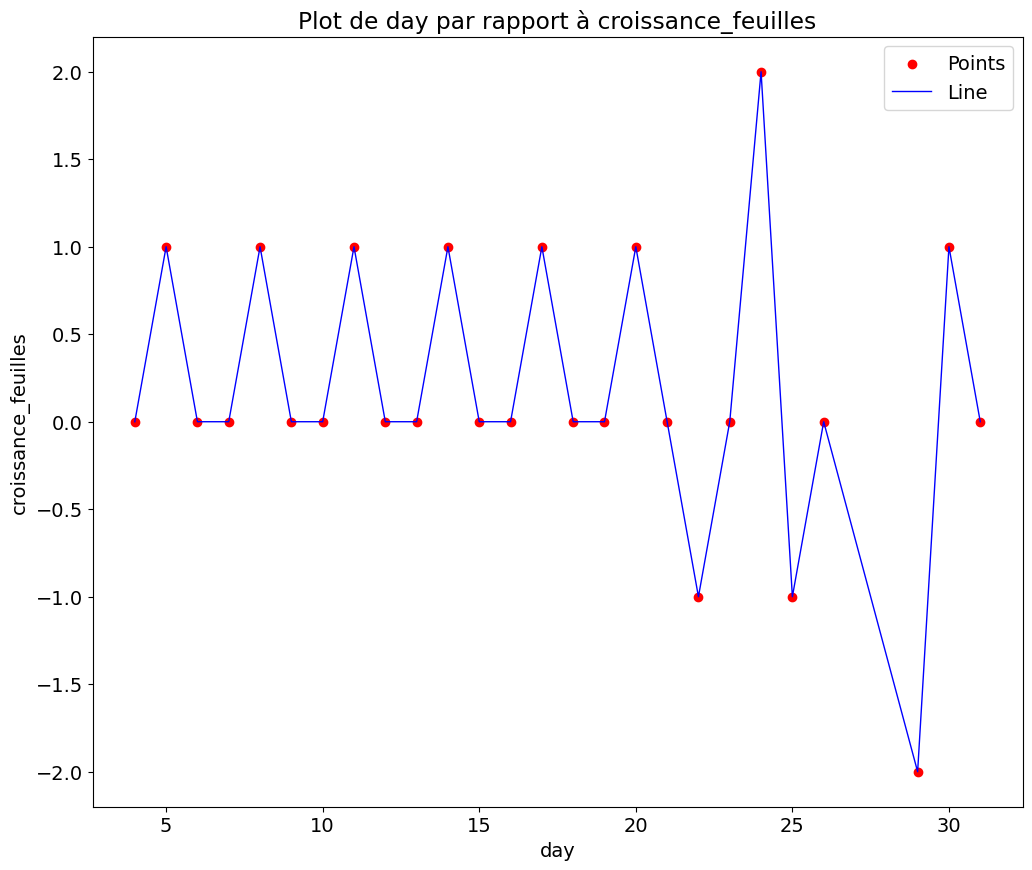

Plant_045-1


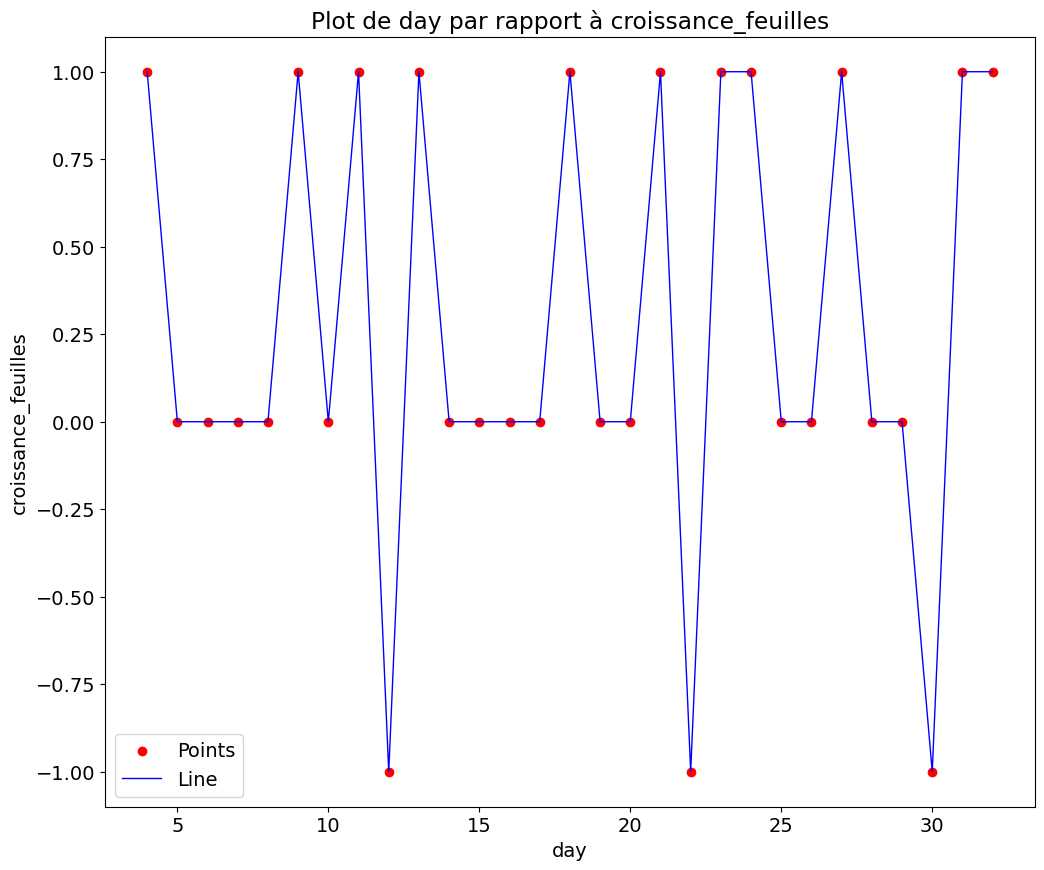

Plant_001-9


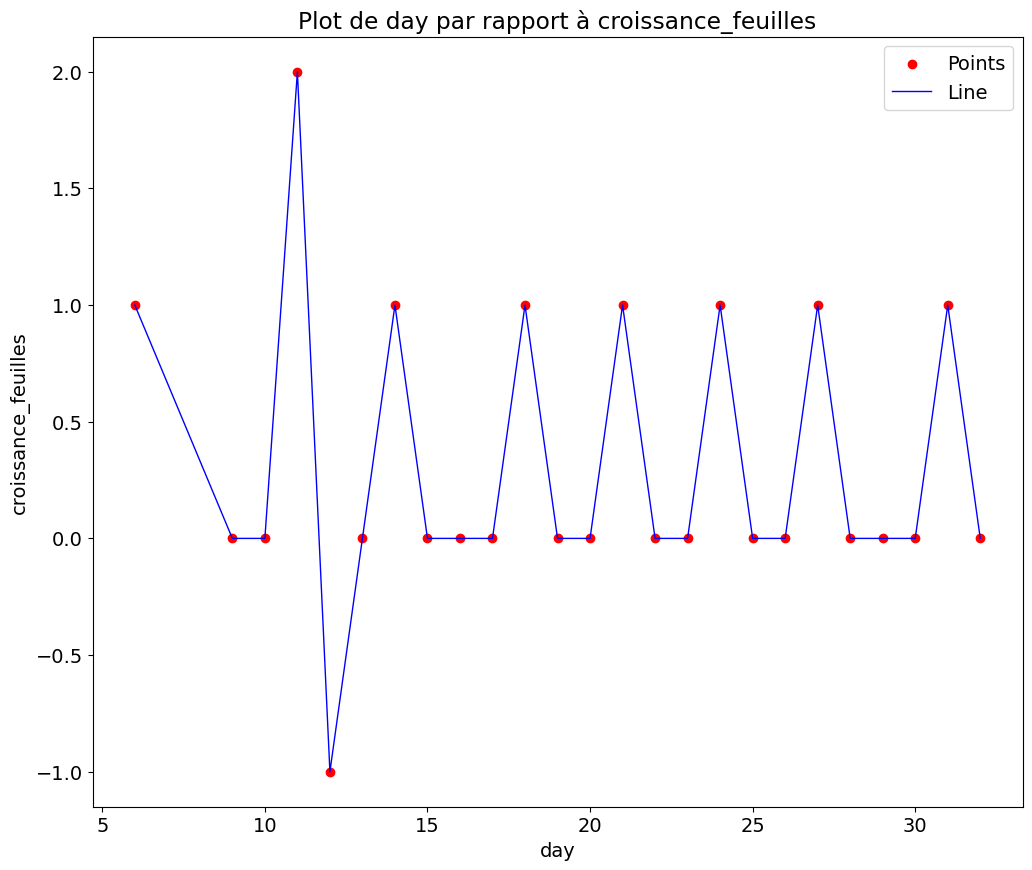

Plant_047-25


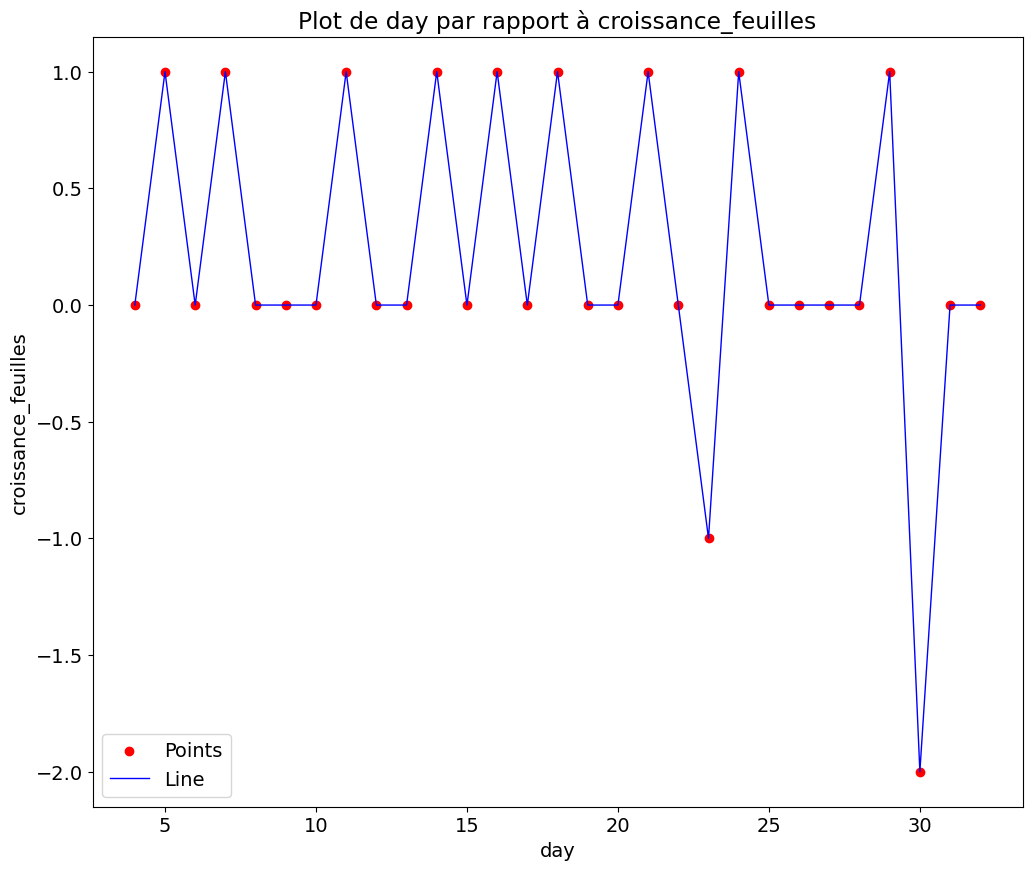

Plant_016-20


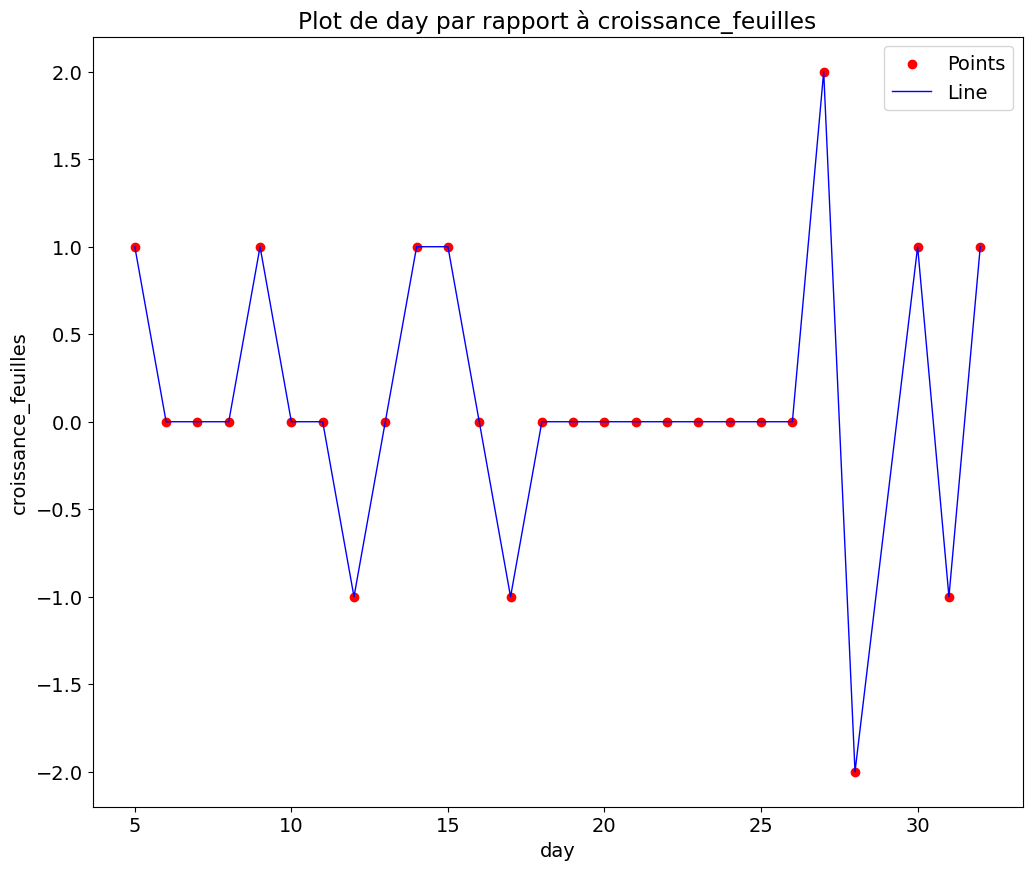

Plant_071-8


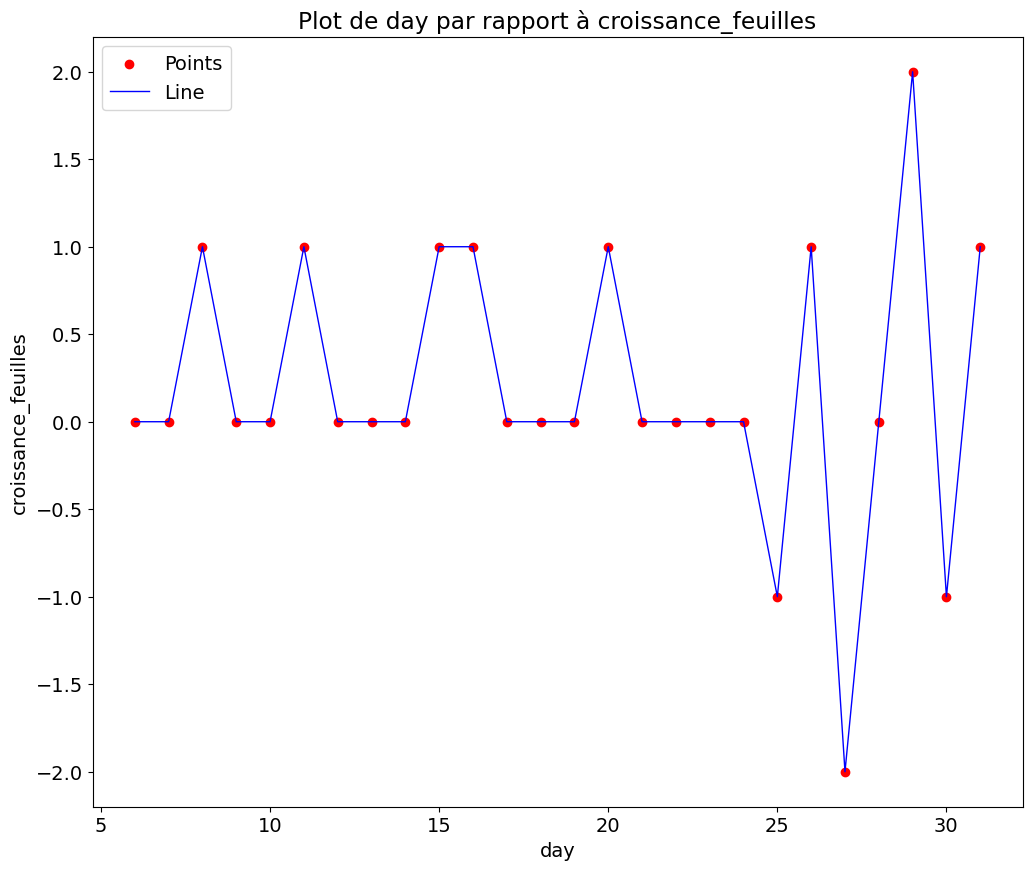

Plant_008-19


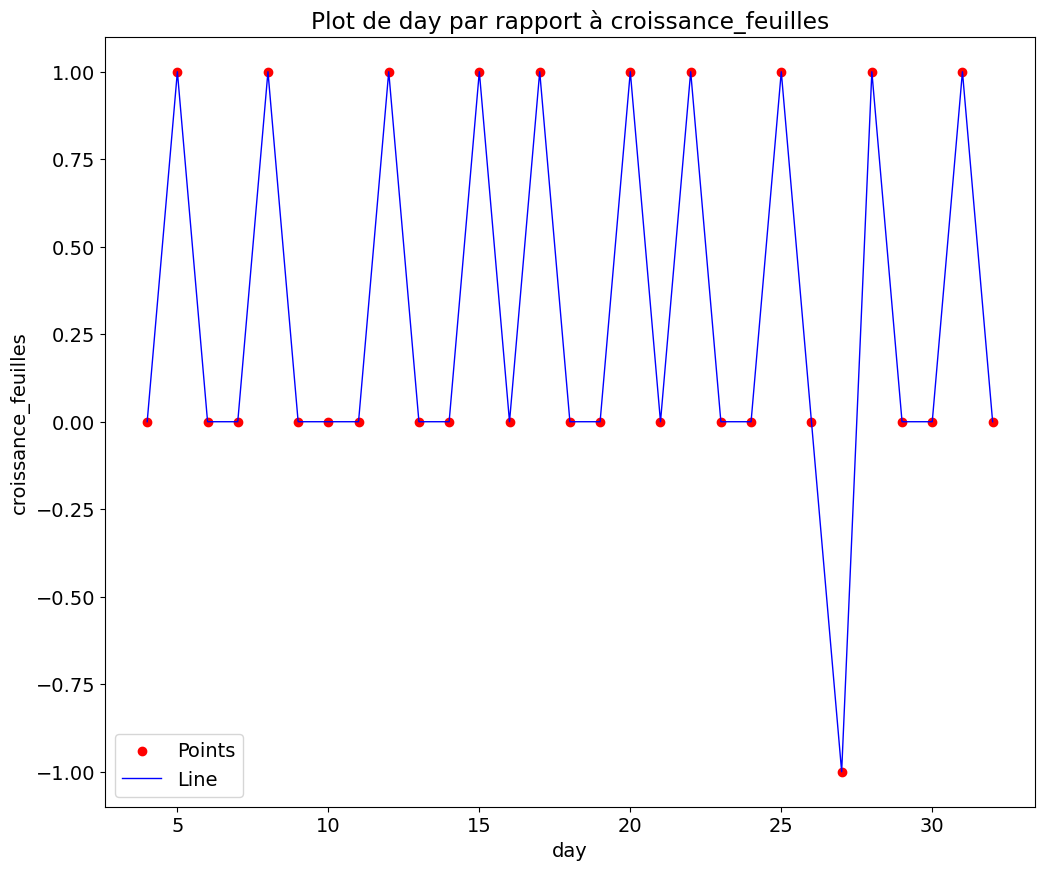

Plant_063-32


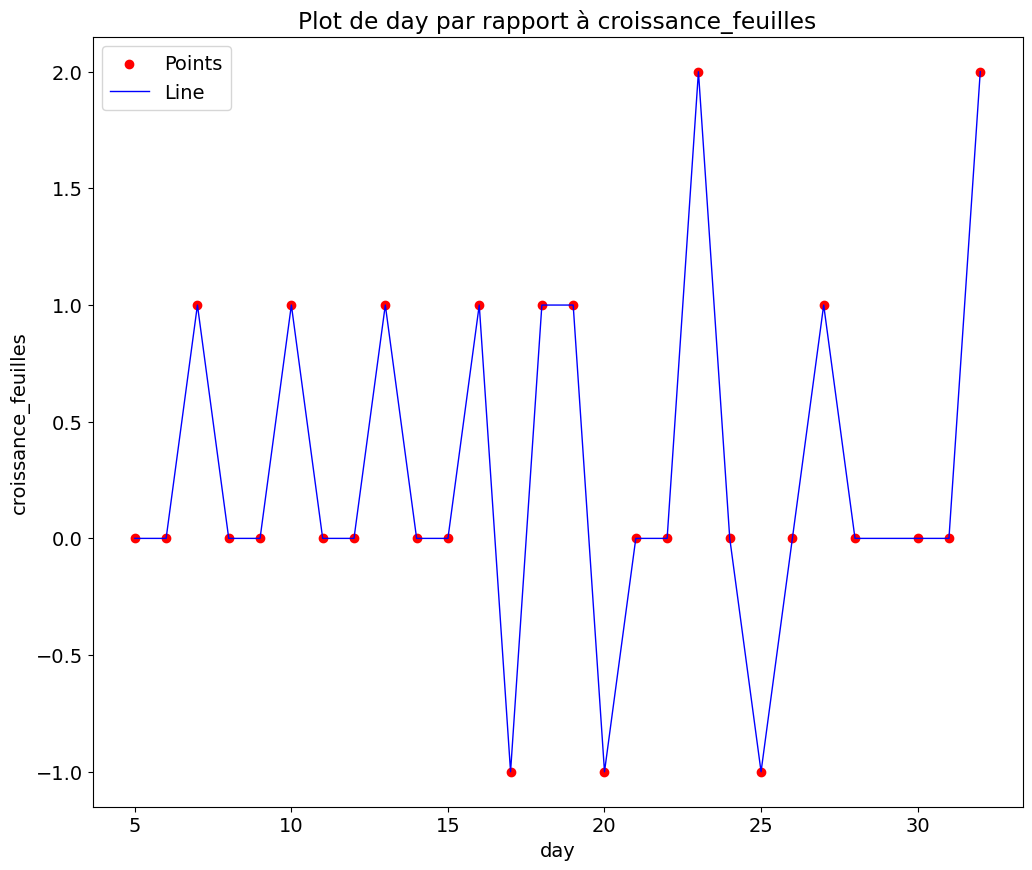

Plant_006-25


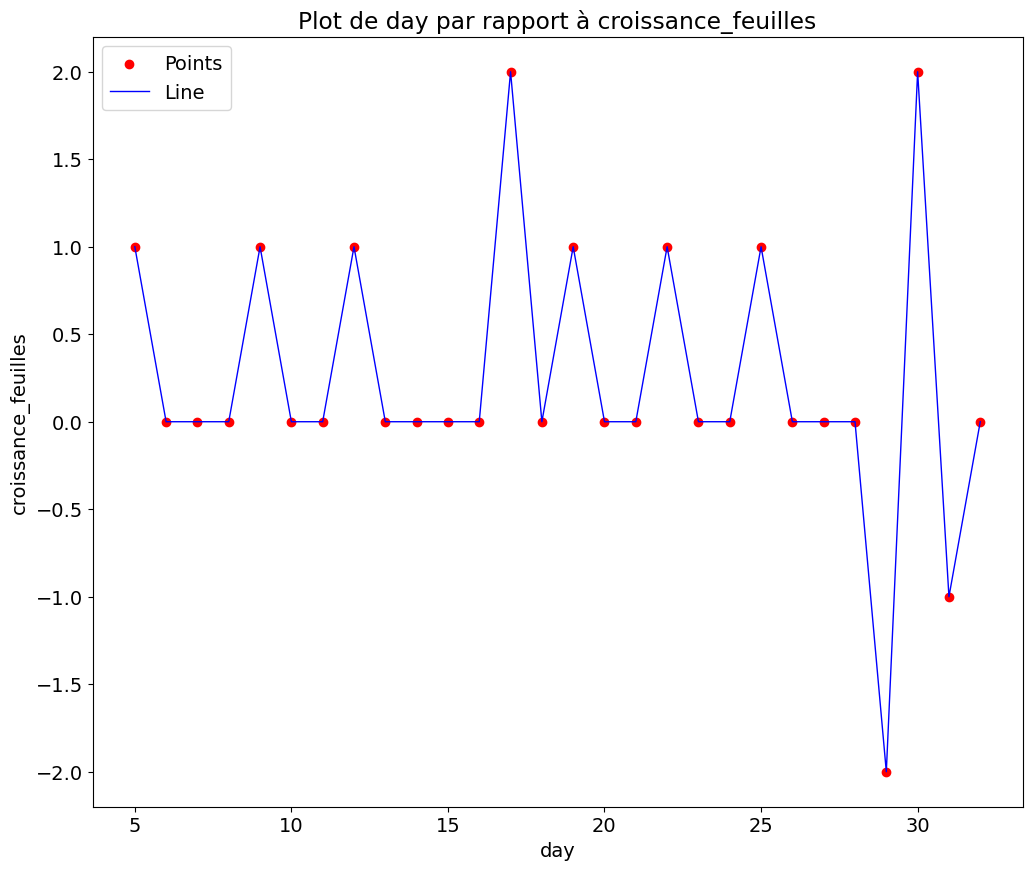

Plant_076-24


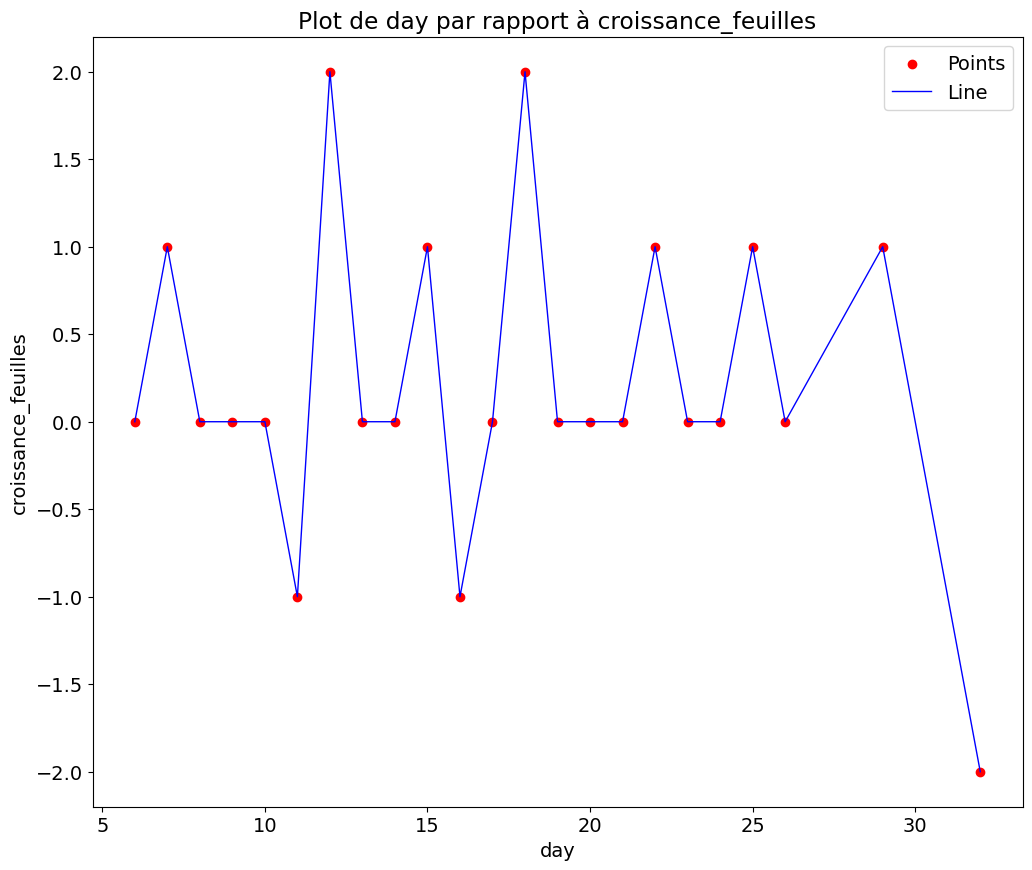

Plant_023-1


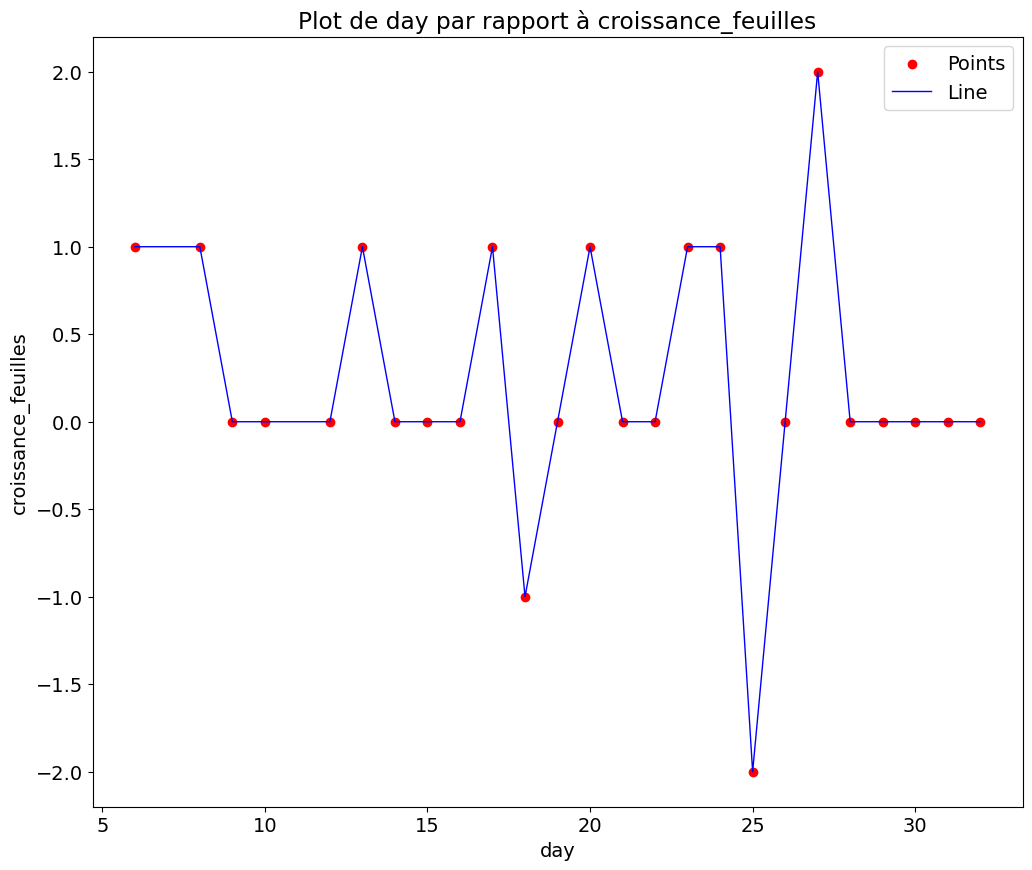

Plant_104-24


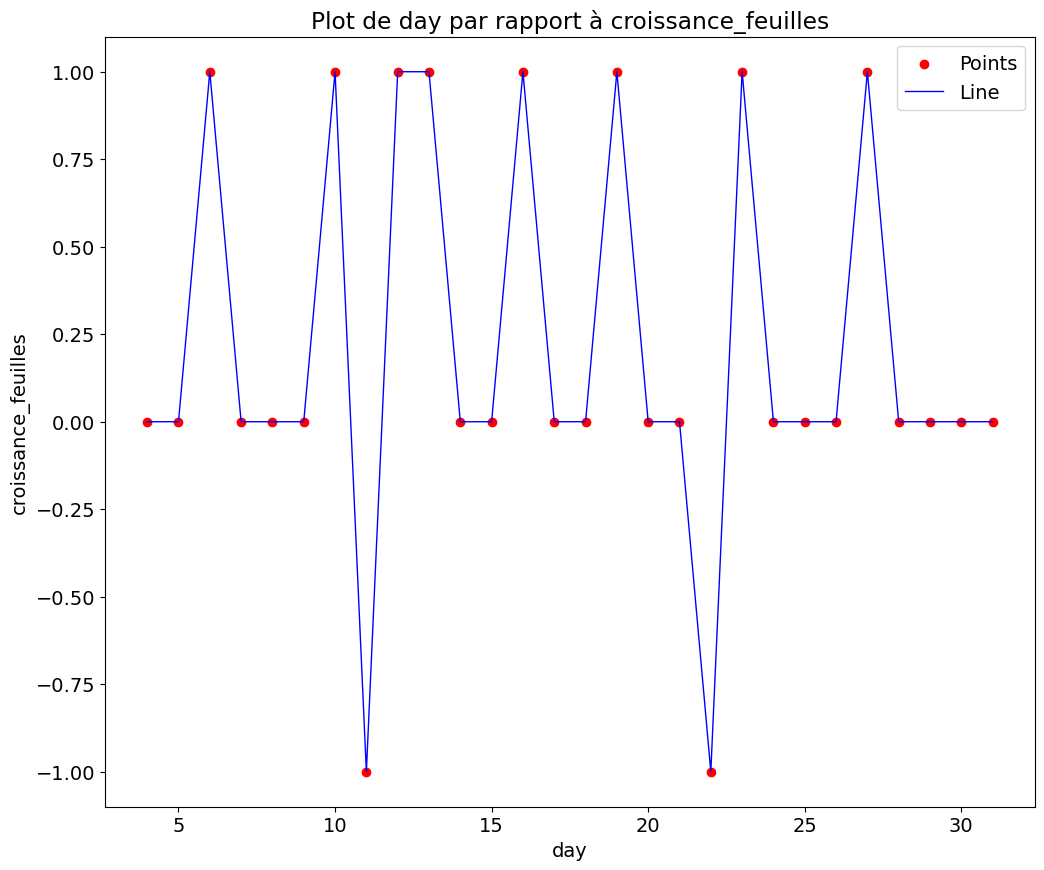

Plant_070-11


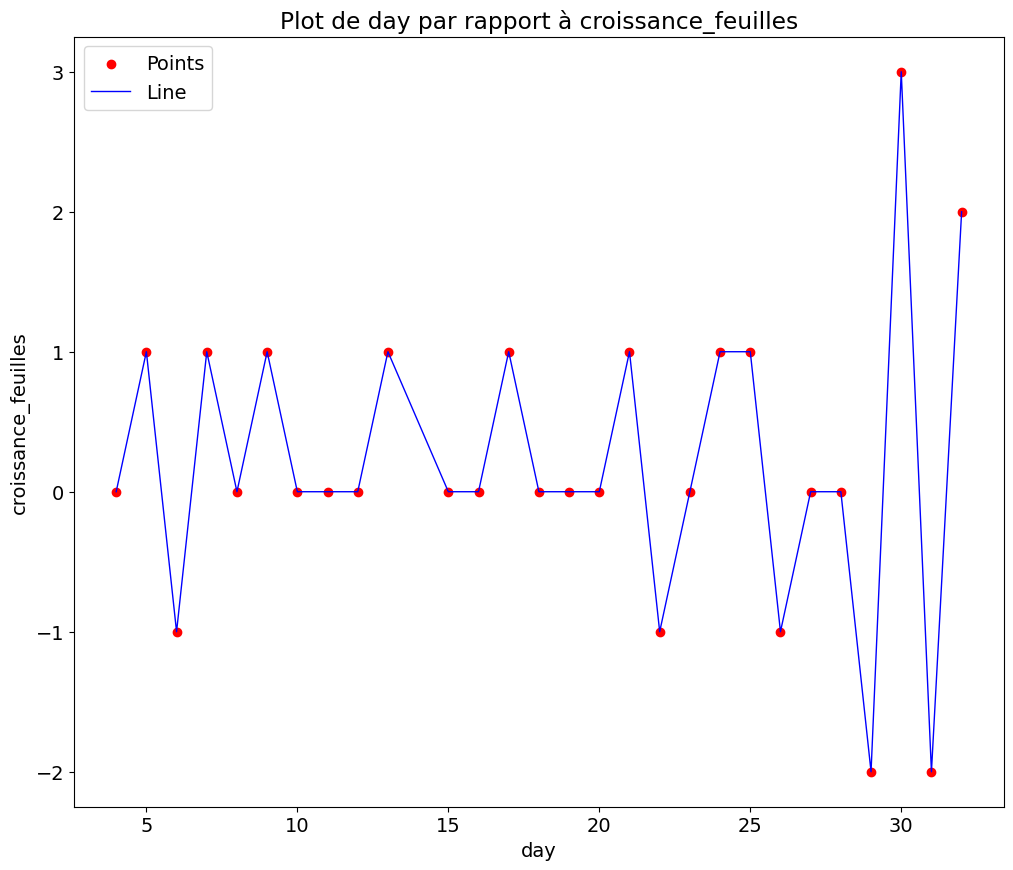

In [71]:
plot_columns(data,'day','croissance_feuilles')

In [ ]:
data = pd.read_csv('/kaggle/working/mis_a_jour.csv')
for index,row in data.iterrows():
    plt.rcParams["figure.figsize"] = [12., 10.]
    plt.rcParams.update({'font.size': 14})
    plt.plot(histcnnds.history["loss"],c='b',label="Ens. d'apprentissage")
    plt.plot(histcnnds.history["val_loss"],c='r',label="Ens. de test")
    plt.xlabel("n_epoch")
plt.ylabel("Erreur")
#plt.ylim([0,0.25])
plt.legend()
plt.show()

In [51]:
unique_values_per_day = df_croissance.groupby('day')['number of leafs'].unique()

In [60]:
# Obtenir les jours distincts et triés
jours = np.sort(df_croissance['day'].unique())

# Obtenir les nombres de feuilles distincts et triés
feuilles = np.sort(df_croissance['number of leafs'].unique())

# Créer une matrice vide pour stocker les données
matrice = np.zeros((len(feuilles), len(jours)))

# Parcourir les jours et les valeurs uniques du nombre de feuilles
for jour, valeurs in unique_values_per_day.items():
    jour_index = np.where(jours == jour)[0][0]
    for feuille in valeurs:
        feuille_index = np.where(feuilles == feuille)[0][0]
        matrice[feuille_index, jour_index] = 1

# Afficher la matrice
print(matrice)
print(len(matrice))

[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
  1. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 1.]]
10


In [76]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Créer un DataFrame vide pour stocker les caractéristiques
features = pd.DataFrame()

# Parcourir chaque jour et ses valeurs uniques du nombre de feuilles
for jour, valeurs in unique_values_per_day.items():
    # Créer les colonnes encodées one-hot pour chaque valeur unique
    jour_features = pd.get_dummies(valeurs, prefix='jour{}_feuilles'.format(jour))
    
    # Ajouter les colonnes au DataFrame des caractéristiques
    features = pd.concat([features, jour_features], axis=1)

# Afficher les caractéristiques
print(features)

   jour3_feuilles_2  jour3_feuilles_3  jour4_feuilles_2  jour4_feuilles_3  \
0               1.0               0.0               1.0               0.0   
1               0.0               1.0               0.0               1.0   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   
5               NaN               NaN               NaN               NaN   
6               NaN               NaN               NaN               NaN   

   jour5_feuilles_2  jour5_feuilles_3  jour6_feuilles_2  jour6_feuilles_3  \
0               0.0               1.0               0.0               1.0   
1               1.0               0.0               0.0               0.0   
2               NaN               NaN               1.0               0.0   
3               NaN               NaN               NaN               NaN  

In [74]:
for jour, valeurs in unique_values_per_day.items():
    print("Jour:", jour)
    print("Valeurs uniques:", valeurs)
    print("--------------")

Jour: 3
Valeurs uniques: [2 3]
--------------
Jour: 4
Valeurs uniques: [2 3]
--------------
Jour: 5
Valeurs uniques: [3 2]
--------------
Jour: 6
Valeurs uniques: [3 4 2]
--------------
Jour: 7
Valeurs uniques: [3 4]
--------------
Jour: 8
Valeurs uniques: [4 3]
--------------
Jour: 9
Valeurs uniques: [4 3]
--------------
Jour: 10
Valeurs uniques: [4 3 5]
--------------
Jour: 11
Valeurs uniques: [5 4 3]
--------------
Jour: 12
Valeurs uniques: [5 4 3]
--------------
Jour: 13
Valeurs uniques: [5 4 3 6]
--------------
Jour: 14
Valeurs uniques: [6 5 4]
--------------
Jour: 15
Valeurs uniques: [6 5]
--------------
Jour: 16
Valeurs uniques: [6 5 7]
--------------
Jour: 17
Valeurs uniques: [7 5 4 6]
--------------
Jour: 18
Valeurs uniques: [7 6 8 4 5]
--------------
Jour: 19
Valeurs uniques: [7 6 8 4 5]
--------------
Jour: 20
Valeurs uniques: [8 6 4 7]
--------------
Jour: 21
Valeurs uniques: [8 7 9 4 6]
--------------
Jour: 22
Valeurs uniques: [7 6 9 4 8]
--------------
Jour: 23
Valeurs un

In [72]:
features = df_croissance[['day', 'number of leafs']].values

array([[3, 2],
       [4, 2],
       [5, 3],
       [6, 3],
       [7, 3],
       [8, 4],
       [9, 4],
       [10, 4],
       [11, 5],
       [12, 5],
       [13, 5],
       [14, 6],
       [15, 6],
       [16, 6],
       [17, 7],
       [18, 7],
       [19, 7],
       [20, 8],
       [21, 8],
       [22, 7],
       [23, 7],
       [24, 9],
       [25, 8],
       [26, 8],
       [29, 6],
       [30, 7],
       [31, 7],
       [3, 2],
       [4, 3],
       [5, 3],
       [6, 3],
       [7, 3],
       [8, 3],
       [9, 4],
       [10, 4],
       [11, 5],
       [12, 4],
       [13, 5],
       [14, 5],
       [15, 5],
       [16, 5],
       [17, 5],
       [18, 6],
       [19, 6],
       [20, 6],
       [21, 7],
       [22, 6],
       [23, 7],
       [24, 8],
       [25, 8],
       [26, 8],
       [27, 9],
       [28, 9],
       [29, 9],
       [30, 8],
       [31, 9],
       [32, 10],
       [4, 2],
       [6, 3],
       [9, 3],
       [10, 3],
       [11, 5],
       [12, 4],
       [

In [69]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.utils import to_categorical

features = matrice

labels = np.ones(len(features))

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir les labels en une représentation catégorielle binaire
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# Construction du modèle CNN
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(30,)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
# Entraînement du modèle
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.7572 - accuracy: 0.5000 - val_loss: 0.9421 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 33ms/step - loss: 0.8037 - accuracy: 0.6250 - val_loss: 0.9172 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 1.0095 - accuracy: 0.2500 - val_loss: 0.8901 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 33ms/step - loss: 0.8215 - accuracy: 0.3750 - val_loss: 0.8640 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 33ms/step - loss: 0.9614 - accuracy: 0.5000 - val_loss: 0.8383 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 32ms/step - loss: 0.7270 - accuracy: 0.6250 - val_loss: 0.8142 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 0.8834 - accuracy: 0.2500 - val_loss: 0.7912 - val_accuracy: 0.0000e+00
E